# BUSINESS CASE: WITH THE FIFA20 DATASET WE NEED TO CLUSTER THE PLAYER BY THEIR SKILL INTO CERTAIN GROUP

## INTRODUCTION OF PROJECT:

FIFA 20 is a football simulation video game published by Electronic Arts as part of the FIFA series. It is the 27th installment in the FIFA series, and was released on 27 September 2019 for Microsoft Windows, PlayStation 4, Xbox One, and Nintendo Switch.

### IMPORT REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# EXPLORATORY DATA ANALYSIS

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
# Load the data
fifa=pd.read_csv('Data/players_20.csv')


In [4]:
fifa.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [5]:
# Make copy of the original data
original_data=fifa.copy()

In [6]:
original_data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

The following features are the abbrevations of field positions:
* LS: Left striker
* ST: Striker
* RS: Right striker
* LW: Left winger
* LF: Left forward
* CF: Center forward
* RF: Right forward
* RW: Right Winger
* LAM: Left Attacking Midfield
* CAM: Center Attacking Midfield
* RAM: Right Attacking Midfield
* LM: Left Midfield
* LCM: Left Center Midfield
* CM: Center Midfield
* RCM: Right Center Midfield
* RM: Right Midfield
* LWB: Left Wing Back
* LDM: Left Defensive Midfield
* CDM: Center Defensive Midfield
* RDM: Right Defensive Midfield
* RWB: Right Wing Back
* LB: Left Back
* LCB: Left Center Back
* CB: Center Back
* RCB: Right Center Back
* RB: Right Back

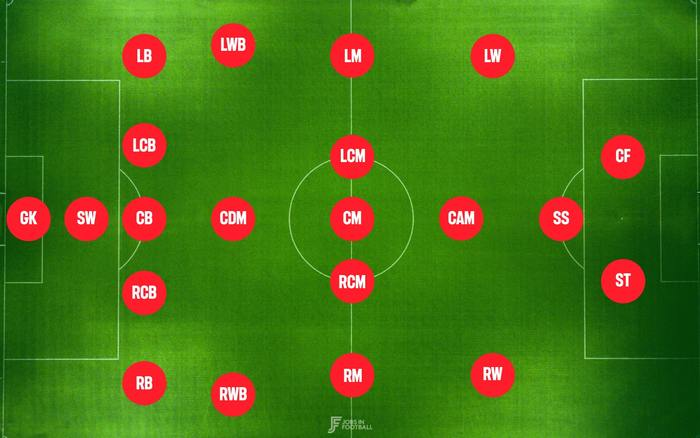

In [7]:
fifa.shape

(18278, 104)

In [8]:
original_data.loc[original_data['player_positions'].str.contains('GK')].head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,NaN,GK,1.0,NaN,2014-07-01,2022.0,SUB,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramses Becker,26,1992-10-02,191,91,Brazil,Liverpool,89,91,58000000,155000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,111700000.0,NaN,GK,1.0,NaN,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,"Flair, Swerve Pass",17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,28,1990-11-07,192,82,Spain,Manchester United,89,90,56000000,205000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,110600000.0,NaN,GK,1.0,NaN,2011-07-01,2020.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,84.0,81.0,92.0,58.0,85.0,"Flair, Second Wind, Flair Passes",17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,210257,https://sofifa.com/player/210257/ederson-santa...,Ederson,Ederson Santana de Moraes,25,1993-08-17,188,86,Brazil,Manchester City,88,91,54500000,185000,GK,Left,2,3,1,Medium/Medium,Normal,Yes,104900000.0,NaN,GK,31.0,NaN,2017-07-01,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,"Leadership, Swerve Pass, Acrobatic Clearance",20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
original_data.loc[original_data['player_positions'].str.contains('GK')].shape

(2036, 104)

### Observations
* There are clear separation between the Goal Keeping skills and Outfielding skills.

* There are 2036 goalkeepers.

## 1. Basic Checks

In [10]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [11]:

# Create a DataFrame with column information
column_info = pd.DataFrame({
    'Column': original_data.columns,
    'Dtype': original_data.dtypes,
    'Non-Null Count': original_data.count(),
    'Null Count': original_data.isnull().sum(),
    'Total': original_data.isnull().count()
})

# Display the DataFrame without any index
column_info.style.hide_index()

Column,Dtype,Non-Null Count,Null Count,Total
sofifa_id,int64,18278,0,18278
player_url,object,18278,0,18278
short_name,object,18278,0,18278
long_name,object,18278,0,18278
age,int64,18278,0,18278
dob,object,18278,0,18278
height_cm,int64,18278,0,18278
weight_kg,int64,18278,0,18278
nationality,object,18278,0,18278
club,object,18278,0,18278


### Observations

* For outfielding skills like pace, shooting, passing, dribbling, defending, physic, there are 2036 NULL values. It means for all the goalkeepers these features are kept NULL.It should have been 0.

* For goalkeeping skills like gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, there are only 2036 NON-NULL values. It means for all the outfielders these features are kept NULL. It should have been 0.

* For all the position features like 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', there are 2036 NULL values. It means for all the goalkeepers these features are kept NULL.It should have been 0.

## 2. Statistical Analysis

In [12]:
original_data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

### Observation
* No Constant feature in continuous and discrete features.

* In the context of football player data, the wage and value of a player are monetary figures that represent the player's earnings and market value, respectively. While it is technically possible to have 'wage_eur' or 'value_eur' figures equal to 0 in a dataset, it would typically be an unusual and potentially erroneous scenario.


In [13]:
original_data.describe(include='O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,loaned_from,joined,nation_position,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,1499,18038,1048,16990,1126,7566,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,2,83,29,316,1760,26,921,94,94,94,107,103,103,103,107,103,103,103,100,88,88,88,100,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/251872/robert-neciu/...,J. Rodríguez,Liam Kelly,1992-02-29,England,Lecce,CB,Right,Medium/Medium,Normal,No,#Strength,SUB,Atalanta,2019-07-01,SUB,Early Crosser,61+2,61+2,61+2,63+2,63+2,63+2,63+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,16310,514,7820,17,1465,587,501,725,725,725,736,727,727,727,736,748,748,748,809,775,775,775,809,682,636,636,636,682,667,621,621,621,667


### Observation
* No Constant feature in categorical features.
* player_url is a unique feature

In [14]:
column_list = fifa.columns.tolist()
print(column_list)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

## 3.Univariate Analysis

In [15]:
univariate = fifa[[ 'age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
                   'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 
                   'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 
                   'team_position', 'joined', 'contract_valid_until', 'nation_position', 'pace', 'shooting', 
                   'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 
                   'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 
                   'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 
                   'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 
                   'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
                   'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 
                   'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 
                   'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 
                   'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
                   'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 
                   'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 
                   'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']]
import sweetviz as sv
my_report = sv.analyze(univariate)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Key Observations
* Players' Age range from 16-42 years with average 25. only 5% of the players are above 33. Most of the players are very young.
* Height (in cm) varies between 156-205. Most of them (>50%) are between 175-188.
* Weight( in kg) varies between 50-110. Most of them (>50%) are between 70-80.
* Most of the players are from England(8%) followed by Germany(7%)
* More than 45 clubs have 33 players each.
* Overall point of a player ranges from 48-94.Only 3.6% of players have overall above 80.
* Player value (in euro ) ranges between 0M -  105.5M with only 5% of them have value above 10.5M.
* Wage (in euro) ranges between 0k-565K with median of 3K. Only 5% of them get wage above 38K.
* There are multiple player positions listed for a player according to their points in each positions.
* Most of the players are right footed
* 92% of players have international reputation 1. Only 6 players have international reputation 5.
* 62% of players have weak foot rating 3.
* More than 50% players have medium attack and defence work rate.
* 89% players dont have their real face.
* 95% of players have release clause less than 20M.Top player has a release clause of 195.8M.
* 43% of the players play in substitute position.
* 89% players' contract validity ended in 2023.
* Only 5% of the players have all the skill points above 70.

## 4.Bivariate and Multivariate Analysis

### Team Position vs Shooting

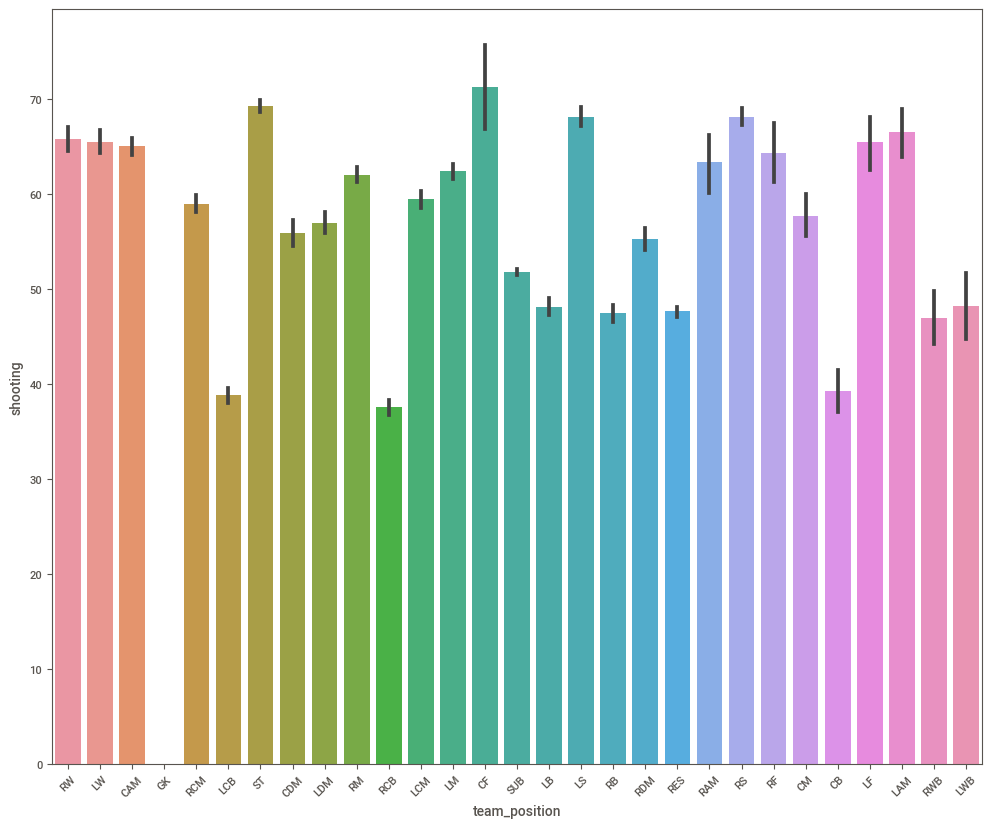

In [16]:
plt.figure(figsize=(12,10))
sns.barplot(x='team_position',y='shooting',data=fifa)
plt.xticks(rotation=45)
plt.show()

* Center Forward has the highest shooting capacity followed by Striker

### Overall Vs International reputation

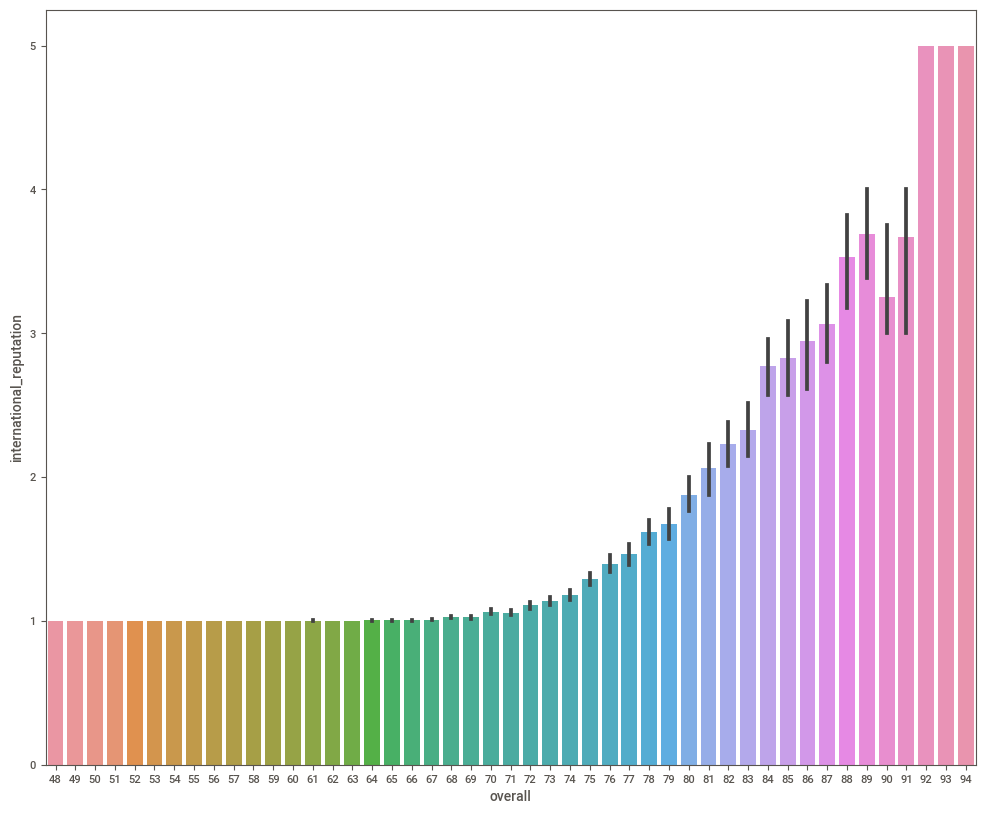

In [17]:
plt.figure(figsize=(12,10))
sns.barplot(fifa.overall,fifa.international_reputation)
plt.show()

* As player's overall rating increases international reputation also increases

### wage_eur, value_eur, release_clause_eur Vs Overall rating

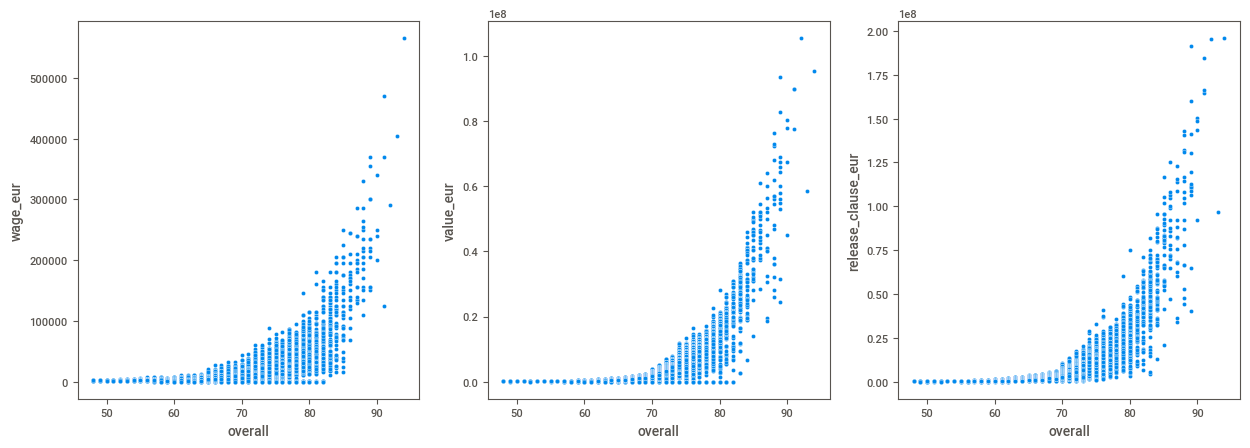

In [18]:
plt.figure(figsize=(15,5))
plt_num = 1

for column in ["wage_eur", "value_eur", "release_clause_eur"]:
    if plt_num <= 3:
        plt.subplot(1,3,plt_num)
        sns.scatterplot(x="overall", y=column, data=fifa)
    plt_num += 1
plt.show()

* As the overall point increases, a player's value,wage and release clause tend to increase.
* But very few players are paid in the top most slab. They look like outliers but they are actual data.

### wage_eur, value_eur, release_clause_eur Vs international reputation

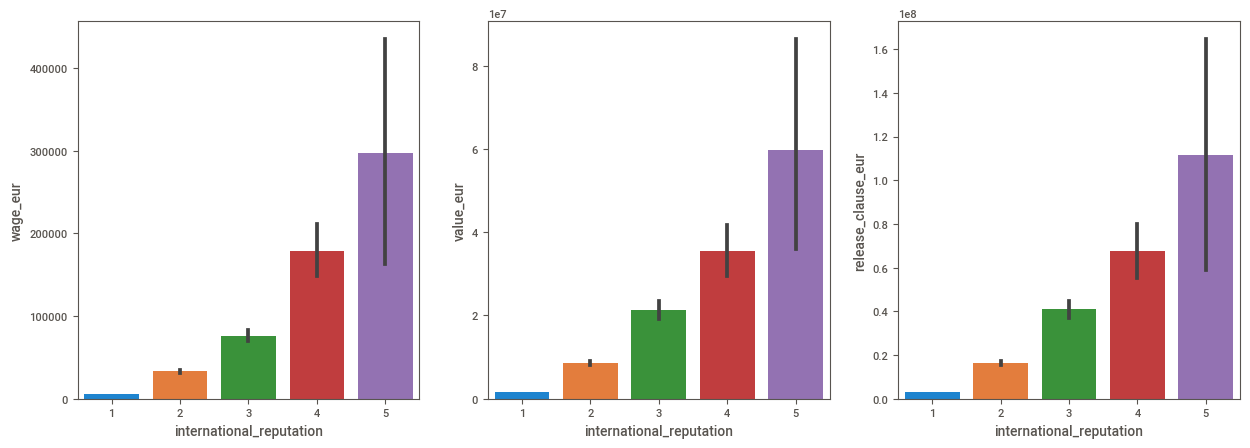

In [19]:
plt.figure(figsize=(15,5))
plt_num = 1

for column in [ "wage_eur","value_eur", "release_clause_eur"]:
    if plt_num <= 3:
        plt.subplot(1,3,plt_num)
        sns.barplot(x="international_reputation", y=column, data=fifa)
    plt_num += 1
plt.show()

* As the international reputation increases, a player's value,wage and release clause tend to increase.

### Weak foot vs some skills, differentiating on the basis of preferred foot

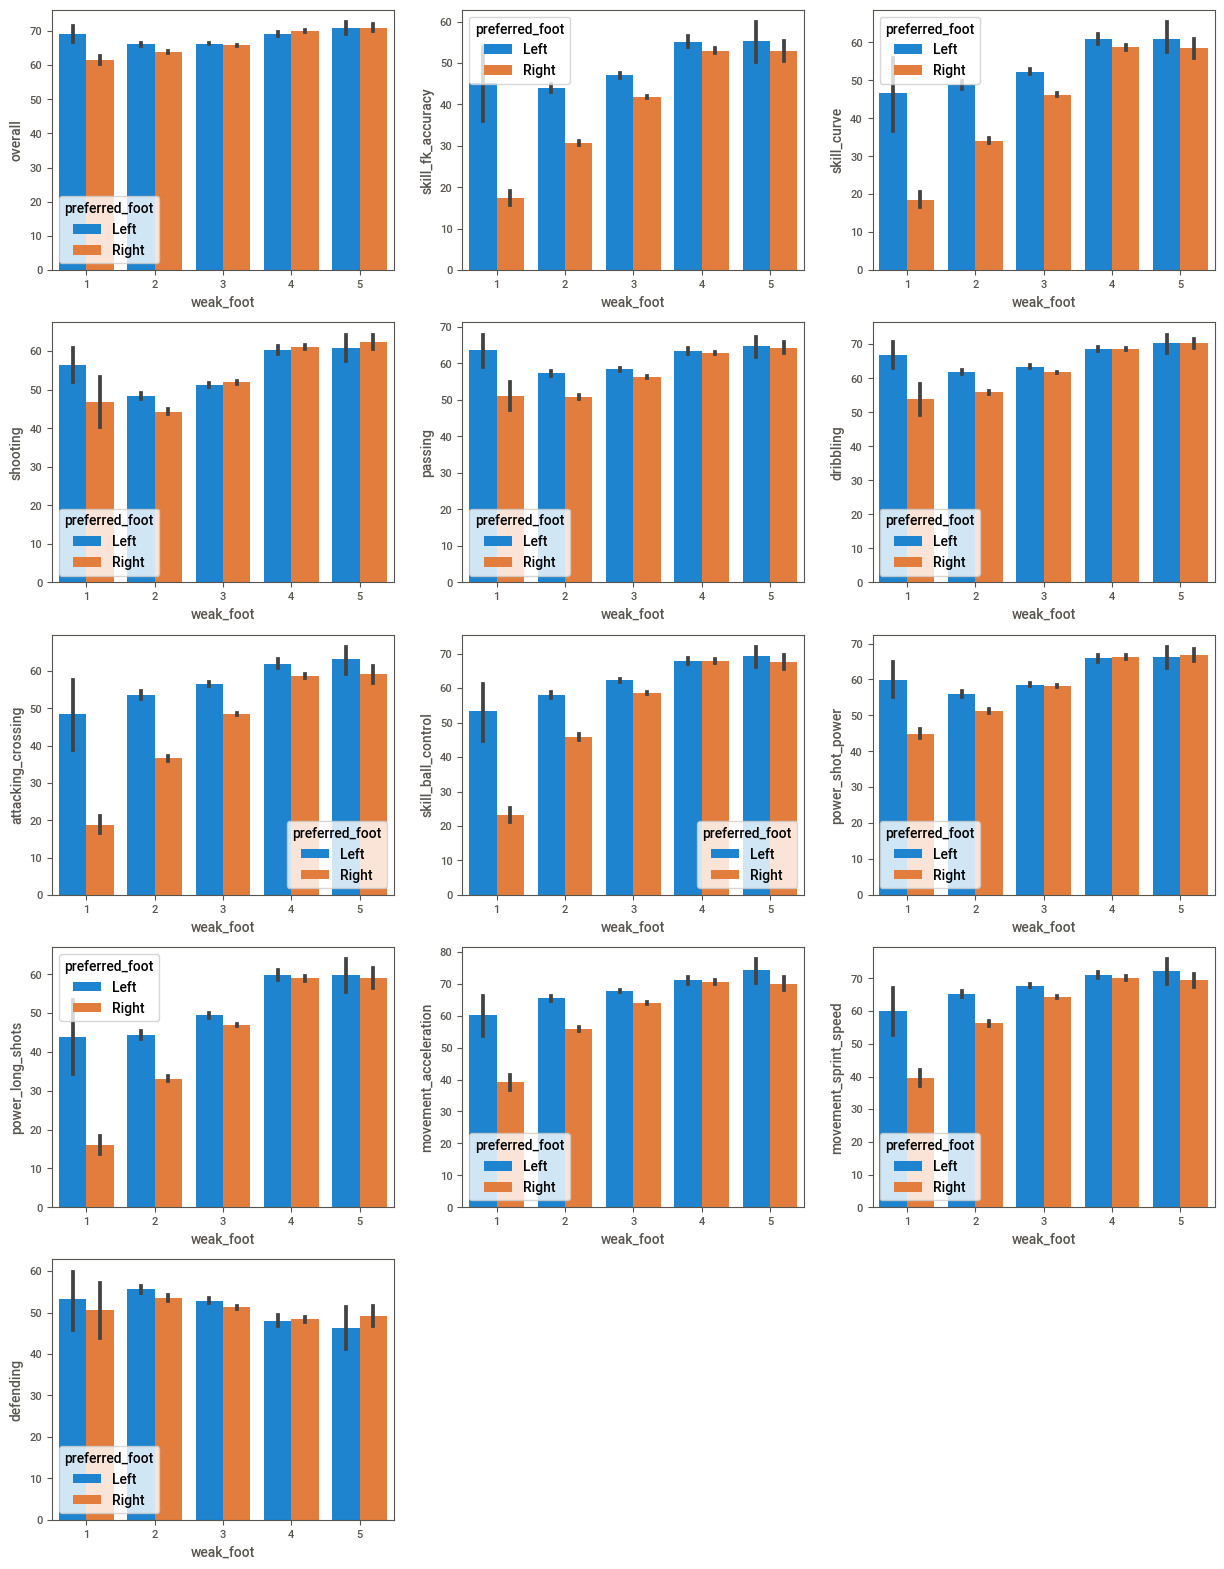

<Figure size 600x400 with 0 Axes>

In [20]:
plt.figure(figsize=(15,20))
plt_num = 1

for column in ["overall",'skill_fk_accuracy','skill_curve','shooting','passing','dribbling','attacking_crossing','skill_ball_control',
               'power_shot_power','power_long_shots','movement_acceleration','movement_sprint_speed','defending']:
    if plt_num <= 15:
        plt.subplot(5,3,plt_num)
        sns.barplot(x="weak_foot", y=column, data=fifa,hue='preferred_foot')
    plt_num += 1
plt.show()
plt.tight_layout()

* With a good weak_foot point, a player's overall points and points of skills like freekick accuracy, skill_curve,shooting,passing,dribbling,attacking_crossing,skill_ball_control, power_shot_power, power_long_shots, movement_acceleration and movement_sprint_speed increases.


* But good weak foot point does not help in improving the skills in defending.


* With good weak foot point, left footers do well with their right foot in freekick accuracy, curve, passing,attacking_crossing,ball_control,power_long_shots,acceleration and sprint speed.

### Age Vs some outfield skills

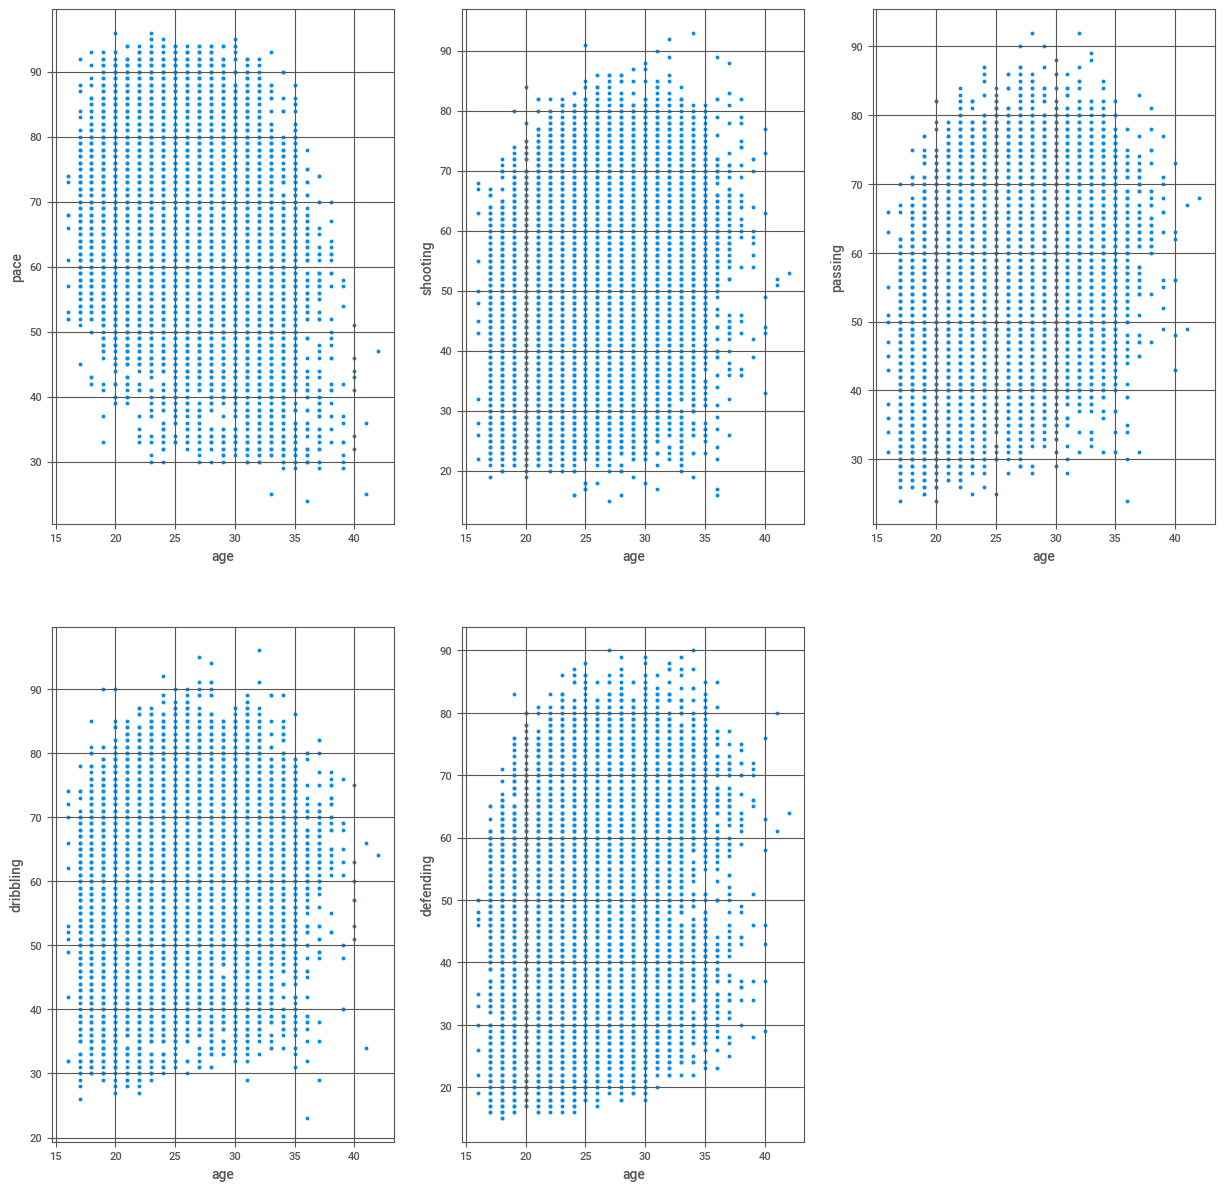

In [21]:
plt.figure(figsize=(15,15))
plt_num = 1

for column in ["pace", "shooting", "passing", "dribbling", "defending"]:
    if plt_num <= 6:
        plt.subplot(2,3,plt_num)
        plt.grid(True)
        sns.scatterplot(x="age", y=column, data=fifa)
    plt_num += 1
plt.show()

* Between the age of 32-33, player's skill in "pace", "shooting", "passing", "dribbling", "defending" start falling.

#  Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?


In [22]:
df_countries=fifa.groupby('nationality').size().sort_values(ascending=False).reset_index(name='Count')
df_countries['Rank']=df_countries['Count'].rank(ascending=False)
country_rank=df_countries.head(10)
country_rank

,nationality,Count,Rank
0,England,1667,1.0
1,Germany,1216,2.0
2,Spain,1035,3.0
3,France,984,4.0
4,Argentina,886,5.0
5,Brazil,824,6.0
6,Italy,732,7.0
7,Colombia,591,8.0
8,Japan,453,9.0
9,Netherlands,416,10.0


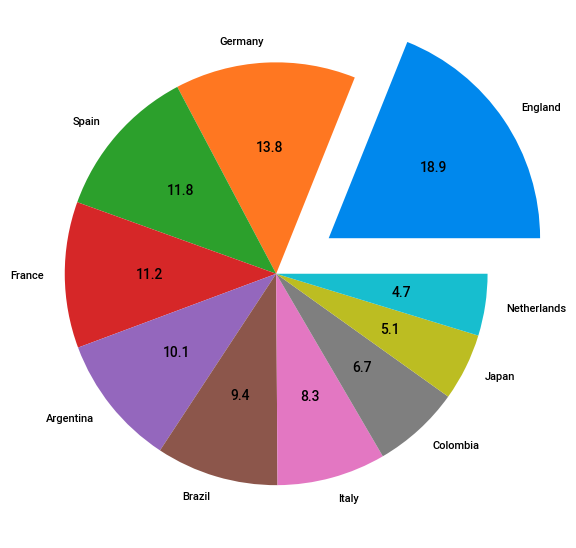

In [23]:
plt.figure(figsize=(7,7))
plt.pie(country_rank.Count,
        labels=country_rank.nationality,
        autopct='%.1f',
        explode=[.3,0,0,0,0,0,0,0,0,0])
plt.show()

# Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

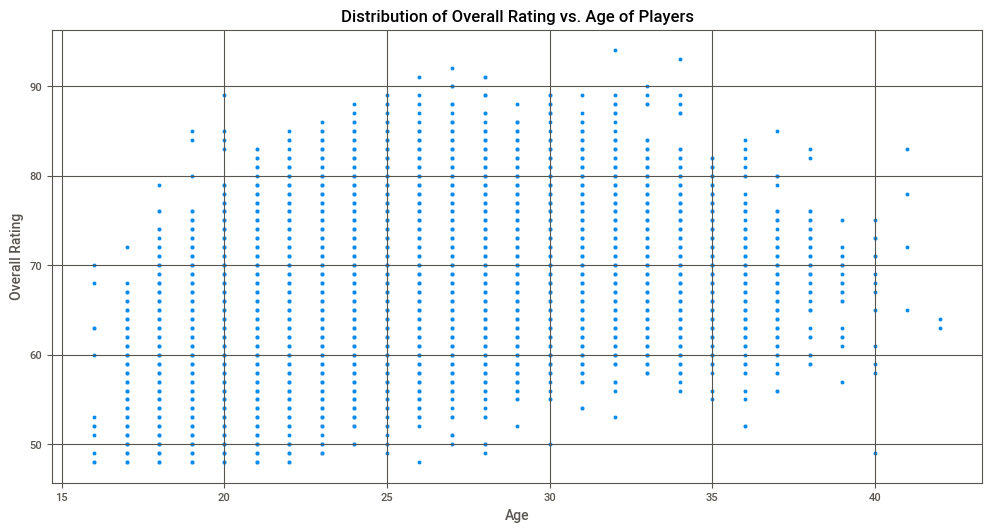

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='overall', data=fifa)
plt.title('Distribution of Overall Rating vs. Age of Players')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()

### **At the age of 34 player stops improving.**

# Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 


In [25]:
original_data[['player_positions','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
               'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']].head(10)

,player_positions,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,"RW, CF, ST",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,"ST, LW",91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,"LW, CAM",84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"LW, CF",83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,"CAM, CM",82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CB,69+3,69+3,69+3,67+3,69+3,69+3,69+3,67+3,69+3,69+3,69+3,69+3,74+3,74+3,74+3,69+3,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,CM,77+3,77+3,77+3,84+3,83+3,83+3,83+3,84+3,86+3,86+3,86+3,85+3,87+3,87+3,87+3,85+3,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,"RW, ST",84+3,84+3,84+3,88+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,87+3,81+3,81+3,81+3,87+3,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


* Let's assume that the player positions are listed in the 'player_positions' column according to their best ability in those positions and the player's preference.
* The first position in the list is considered their best performing position when cross checked with their position columns' points.
* So we can split and choose only the first position from the list.

In [26]:
offensive_positions = ['ST', 'RW', 'LW']
fifa['player_positions']=fifa['player_positions'].str.split(',').str[0]


In [27]:
# top20 top-waged player positions
fifa[['player_positions','wage_eur']].sort_values(by=['wage_eur'],ascending=False,ignore_index=True).head(20)


,player_positions,wage_eur
0,RW,565000
1,LW,470000
2,ST,405000
3,CAM,370000
4,CF,370000
5,ST,355000
6,CM,340000
7,CM,330000
8,ST,300000
9,CDM,300000


In [28]:
offensive_players=fifa.loc[fifa['player_positions'].isin(offensive_positions)]

In [29]:
# mean() is influenced by the outlier kind of 'wage_eur' values of top players. So we use median(). 
avg_wages=offensive_players.groupby('player_positions')['wage_eur'].median().sort_values(ascending=False).reset_index(name='Avg_wage')
avg_wages

,player_positions,Avg_wage
0,ST,4000
1,LW,3000
2,RW,3000


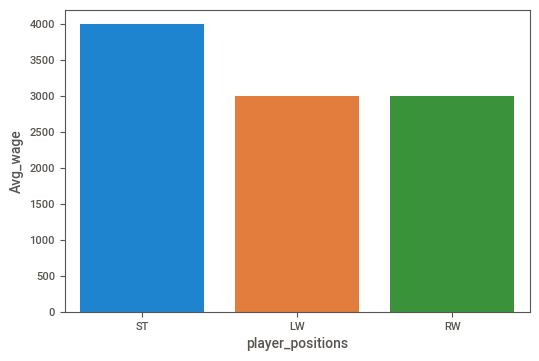

In [30]:

sns.barplot(x='player_positions',y='Avg_wage',data=avg_wages)
plt.show()


### **Strikers are paid the most.**

# DATA PREPROCESSING / FEATURE ENGINEERING

## 1.CHECKING AND IMPUTING MISSING VALUE

In [31]:
# Create a DataFrame with column information
column_info_pct = pd.DataFrame({
    'Column': fifa.columns,
    'Non-Null Count': fifa.count(),
    'Null Count': fifa.isnull().sum(),
    'Total': fifa.isnull().count(),
    'Missing Percentage':fifa.isnull().sum()/fifa.isnull().count()*100 ,
    'Dtype': fifa.dtypes
})

# Display the DataFrame without any index
column_info_pct.style.hide_index()

Column,Non-Null Count,Null Count,Total,Missing Percentage,Dtype
sofifa_id,18278,0,18278,0.000000,int64
player_url,18278,0,18278,0.000000,object
short_name,18278,0,18278,0.000000,object
long_name,18278,0,18278,0.000000,object
age,18278,0,18278,0.000000,int64
dob,18278,0,18278,0.000000,object
height_cm,18278,0,18278,0.000000,int64
weight_kg,18278,0,18278,0.000000,int64
nationality,18278,0,18278,0.000000,object
club,18278,0,18278,0.000000,object


### 1.NUMERICAL


### release_clause_eur

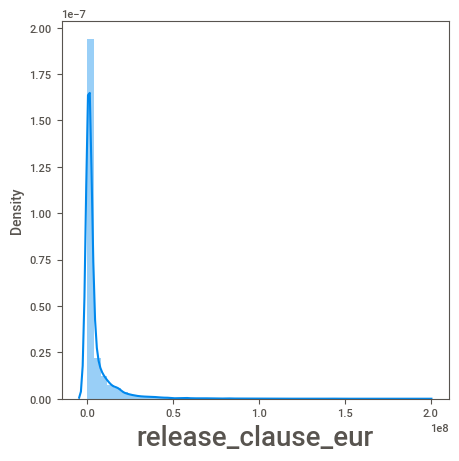

In [32]:
# checking the distributuion before imputing the NULL to decide between mean() and median()
plt.figure(figsize=(5,5)) # defining canvas size
sns.distplot(x=fifa['release_clause_eur']) 
plt.xlabel('release_clause_eur',fontsize=20)
plt.show()

* release_clause_eur has skewed distribution. So we replace NULL value with median.

In [33]:
fifa.loc[fifa['release_clause_eur'].isnull()==True,'release_clause_eur']=fifa['release_clause_eur'].median()

### Outfielder skill features- 'pace','shooting','passing','dribbling','defending','physic'


* As observed earlier, for outfielding skills like pace, shooting, passing, dribbling, defending, physic, there are 2036 NULL values. It means, for all the 2036 goalkeepers, these features are kept NULL.These features should be made 0 for all the 2036 goalkeepers.

In [34]:
fifa.loc[fifa['pace'].isnull()==True,'pace']=0
fifa.loc[fifa['shooting'].isnull()==True,'shooting']=0
fifa.loc[fifa['passing'].isnull()==True,'passing']=0
fifa.loc[fifa['dribbling'].isnull()==True,'dribbling']=0
fifa.loc[fifa['defending'].isnull()==True,'defending']=0
fifa.loc[fifa['physic'].isnull()==True,'physic']=0

In [35]:
# Check missing value after imputation
print('release_clause_eur:',fifa['release_clause_eur'].isnull().sum())
print('pace:',fifa['pace'].isnull().sum())
print('shooting:',fifa['shooting'].isnull().sum())
print('passing:',fifa['passing'].isnull().sum())
print('dribbling:',fifa['dribbling'].isnull().sum())
print('defending:',fifa['defending'].isnull().sum())
print('physic:',fifa['physic'].isnull().sum())

release_clause_eur: 0
pace: 0
shooting: 0
passing: 0
dribbling: 0
defending: 0
physic: 0


### Goalkeeper skill features - 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning'

* As observed earlier, for goalkeeping skills like gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, there are only 2036 NON-NULL values. It means, for all the 16242 outfielders, these features are kept NULL. These features should be made 0 for all the 16242 outfielders.

In [36]:
# checking non null counts
print('gk_diving:',fifa['gk_diving'].count())
print('gk_handling:',fifa['gk_handling'].count())
print('gk_kicking:',fifa['gk_kicking'].count())
print('gk_reflexes:',fifa['gk_reflexes'].count())
print('gk_speed:',fifa['gk_speed'].count())
print('gk_positioning:',fifa['gk_positioning'].count())

gk_diving: 2036
gk_handling: 2036
gk_kicking: 2036
gk_reflexes: 2036
gk_speed: 2036
gk_positioning: 2036


In [37]:
fifa.loc[fifa['gk_diving'].isnull()==True,'gk_diving']=0
fifa.loc[fifa['gk_handling'].isnull()==True,'gk_handling']=0
fifa.loc[fifa['gk_kicking'].isnull()==True,'gk_kicking']=0
fifa.loc[fifa['gk_reflexes'].isnull()==True,'gk_reflexes']=0
fifa.loc[fifa['gk_speed'].isnull()==True,'gk_speed']=0
fifa.loc[fifa['gk_positioning'].isnull()==True,'gk_positioning']=0

### 2.CATEGORICAL

### 'Team Position'

In [38]:
# Getting the value counts of team position
fifa.team_position.value_counts().head(2)

SUB    7820
RES    2958
Name: team_position, dtype: int64

In [39]:
# Impute categorical data using mode(most freqent)
fifa['team_position'] = fifa['team_position'].replace(np.nan,'SUB')

In [40]:
# Check missing value after imputation
fifa['team_position'].isnull().sum()

0

### Position features - 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'

In [41]:
# Split the column values and remove the '+' and the values after them.
pos=['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
     'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
for i in pos:
    fifa[i]=fifa[i].str.split('+',expand=True)[0]
    
    # Changing the datatype from obj to float
    fifa[i]=fifa[i].astype(float)
fifa.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,RW,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,92.0,87.0,87.0,87.0,92.0,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0


* As observed earlier, for all the position features like 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', there are 2036 NULL values. It means for all the 2036 goalkeepers these features are kept NULL. These features should be made 0 for all the 2036 goalkeepers.

In [42]:
# Impute missing value 
fifa.loc[fifa['ls'].isnull()==True,'ls']=0
fifa.loc[fifa['st'].isnull()==True,'st']=0
fifa.loc[fifa['rs'].isnull()==True,'rs']=0
fifa.loc[fifa['lw'].isnull()==True,'lw']=0
fifa.loc[fifa['lf'].isnull()==True,'lf']=0
fifa.loc[fifa['cf'].isnull()==True,'cf']=0
fifa.loc[fifa['rf'].isnull()==True,'rf']=0
fifa.loc[fifa['rw'].isnull()==True,'rw']=0
fifa.loc[fifa['lam'].isnull()==True,'lam']=0
fifa.loc[fifa['cam'].isnull()==True,'cam']=0
fifa.loc[fifa['ram'].isnull()==True,'ram']=0
fifa.loc[fifa['lm'].isnull()==True,'lm']=0
fifa.loc[fifa['lcm'].isnull()==True,'lcm']=0
fifa.loc[fifa['cm'].isnull()==True,'cm']=0
fifa.loc[fifa['rcm'].isnull()==True,'rcm']=0
fifa.loc[fifa['rm'].isnull()==True,'rm']=0
fifa.loc[fifa['lwb'].isnull()==True,'lwb']=0
fifa.loc[fifa['ldm'].isnull()==True,'ldm']=0
fifa.loc[fifa['cdm'].isnull()==True,'cdm']=0
fifa.loc[fifa['rdm'].isnull()==True,'rdm']=0
fifa.loc[fifa['rwb'].isnull()==True,'rwb']=0
fifa.loc[fifa['lb'].isnull()==True,'lb']=0
fifa.loc[fifa['lcb'].isnull()==True,'lcb']=0
fifa.loc[fifa['cb'].isnull()==True,'cb']=0
fifa.loc[fifa['rcb'].isnull()==True,'rcb']=0
fifa.loc[fifa['rb'].isnull()==True,'rb']=0


In [43]:
# Create a DataFrame with column information to check the null values
column_info_pct = pd.DataFrame({
    'Column': fifa.columns,
    'Non-Null Count': fifa.count(),
    'Null Count': fifa.isnull().sum(),
    'Total': fifa.isnull().count(),
    'Missing Percentage':fifa.isnull().sum()/fifa.isnull().count()*100 ,
    'Dtype': fifa.dtypes
})

# Display the DataFrame without any index
column_info_pct.style.hide_index()

Column,Non-Null Count,Null Count,Total,Missing Percentage,Dtype
sofifa_id,18278,0,18278,0.000000,int64
player_url,18278,0,18278,0.000000,object
short_name,18278,0,18278,0.000000,object
long_name,18278,0,18278,0.000000,object
age,18278,0,18278,0.000000,int64
dob,18278,0,18278,0.000000,object
height_cm,18278,0,18278,0.000000,int64
weight_kg,18278,0,18278,0.000000,int64
nationality,18278,0,18278,0.000000,object
club,18278,0,18278,0.000000,object


## 2.ENCODING CATEGORICAL DATA

### 1. 'Player_positions'

In [44]:
# Gettimg value counts of player positions
fifa.player_positions.value_counts()

CB     3162
ST     2582
CM     2193
GK     2036
CDM    1424
RB     1314
LB     1303
CAM    1146
RM     1050
LM     1049
LW      378
RW      369
CF      113
LWB      90
RWB      69
Name: player_positions, dtype: int64

In [45]:
# Use mannual encoding because lots of labels available
fifa.player_positions = fifa.player_positions.map({'CB':14,'ST':13,'CM':12,'GK':11,'CDM':10,'RB':9,'LB':8,
                                                   'CAM':7,'RM':6,'LM':5,'LW':4,'RW':3,'CF':2,'LWB':1,'RWB':0})

### 2. 'preferred_foot'

In [46]:
# Gettimg value counts of preferred foot
fifa.preferred_foot.value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

In [47]:
fifa.preferred_foot = fifa.preferred_foot.map({'Right':1,'Left':0})

### 3. team_position

In [48]:
# Getting the value counts of team position
fifa.team_position.value_counts()

SUB    8060
RES    2958
GK      662
LCB     660
RCB     660
LB      560
RB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: team_position, dtype: int64

In [49]:
# Use mannual encoding because lots of labels available
fifa.team_position = fifa.team_position.map({'SUB':28,'RES':27,'GK':26,'RCB':25,'LCB':24,'RB':23,'LB':22,'ST':21,
                                            'RCM':20,'LCM':19,'RM':18,'LM':17,'CAM':16,'RDM':15,'LDM':14,'RS':13,
                                            'LS':12,'CDM':11,'LW':10,'RW':9,'CB':8,'CM':7,'RWB':6,'LWB':5,'RAM':4,
                                            'LAM':3,'RF':2,'LF':1,'CF':0})

### 4. work_rate
In the project document, it is expected to do the following:
- "This feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is applied as 0 for low, 0.5 for medium and 1 for high."

In [50]:
fifa['work_rate'].value_counts()

Medium/Medium    9875
High/Medium      3216
Medium/High      1718
High/High         986
Medium/Low        886
High/Low          684
Low/Medium        461
Low/High          417
Low/Low            35
Name: work_rate, dtype: int64

In [51]:
fifa['AttackWorkRate']=fifa['work_rate'].str.split('/',expand=True)[0]
fifa['DefenseWorkRate']=fifa['work_rate'].str.split('/',expand=True)[1]
fifa[['work_rate','AttackWorkRate','DefenseWorkRate']].tail()

,work_rate,AttackWorkRate,DefenseWorkRate
18273,Medium/High,Medium,High
18274,Medium/Medium,Medium,Medium
18275,Low/Medium,Low,Medium
18276,Low/Low,Low,Low
18277,Medium/Medium,Medium,Medium


In [52]:
fifa.AttackWorkRate = fifa.AttackWorkRate.map({'Low':0,'Medium':0.5,'High':1})
fifa.DefenseWorkRate = fifa.DefenseWorkRate.map({'Low':0,'Medium':0.5,'High':1})

In [53]:
fifa[['work_rate','AttackWorkRate','DefenseWorkRate']].head(3)

,work_rate,AttackWorkRate,DefenseWorkRate
0,Medium/Low,0.5,0.0
1,High/Low,1.0,0.0
2,High/Medium,1.0,0.5


## 3. HANDLING OUTLIERS

* In univariate analysis, its understood that a very small percent of players have exceptional values in most of the features because of which they have high market values. If the high values in certain features are legitimate and represent exceptional cases (e.g., top-performing players), it might not be appropriate to treat them as outliers.

* If they are valid and essential to understanding the full range of player performance, imputing them to fit with other values might distort the representation of top-performing players.

* You might choose to perform separate analyses for the overall population and the subset of top performers. This way, you can capture the distinct characteristics of elite players without affecting the general trends in the dataset.Here, we are not going to take any subset.

*  Imputing values should be done cautiously, and it's essential to preserve the integrity of the data. Imputing extreme values to fit with other values might lead to misrepresentations.

In [54]:
fifa.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,3,0,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",9,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,92.0,87.0,87.0,87.0,92.0,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0,0.5,0.0
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,13,1,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",10,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,1.0,0.0
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,4,1,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",16,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84.0,84.0,84.0,90.0,89.0,89.0,89.0,90.0,90.0,90.0,90.0,89.0,82.0,82.0,82.0,89.0,66.0,61.0,61.0,61.0,66.0,61.0,46.0,46.0,46.0,61.0,1.0,0.5


In [55]:
out1= fifa[['age','height_cm','weight_kg','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]


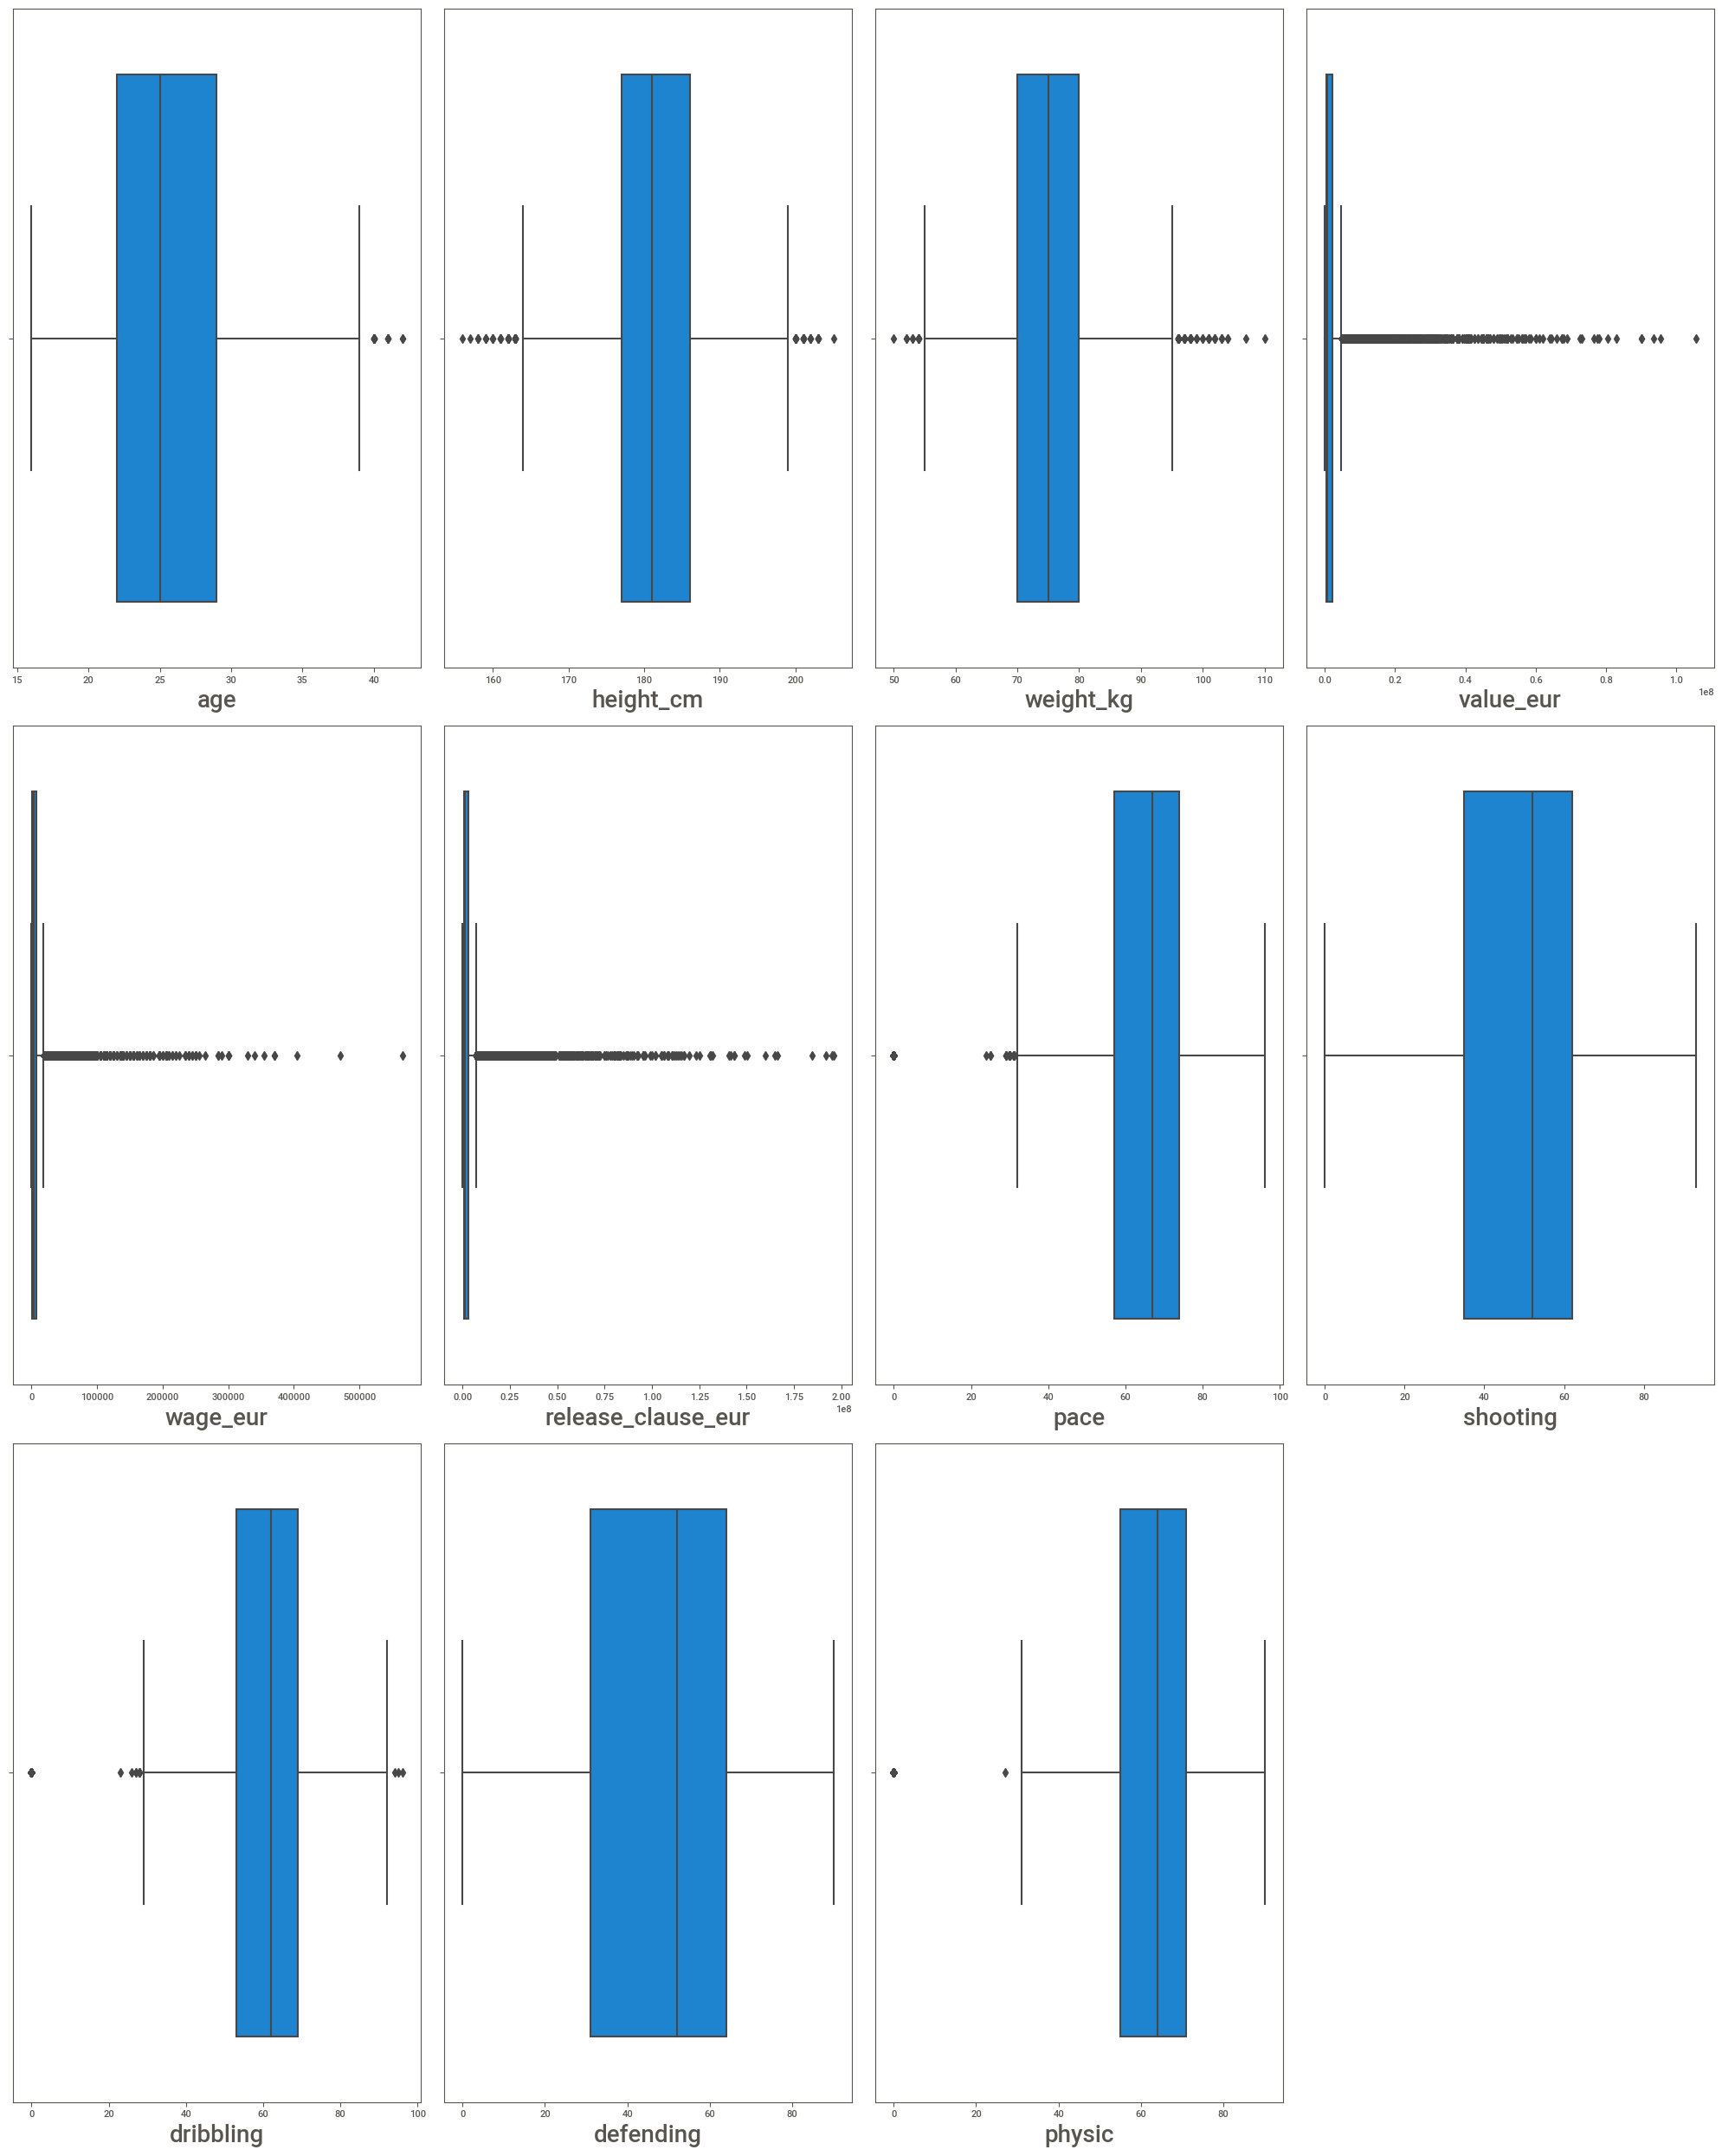

In [56]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in out1: # iteration of columns / accessing the columns from  dataset 
    if plotno<=11:    # set the limit
        plt.subplot(3,4,plotno) # # plotting 11 graphs (3-rows,4-columns) ,plotnumber is for count
        sns.boxplot(x=fifa[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

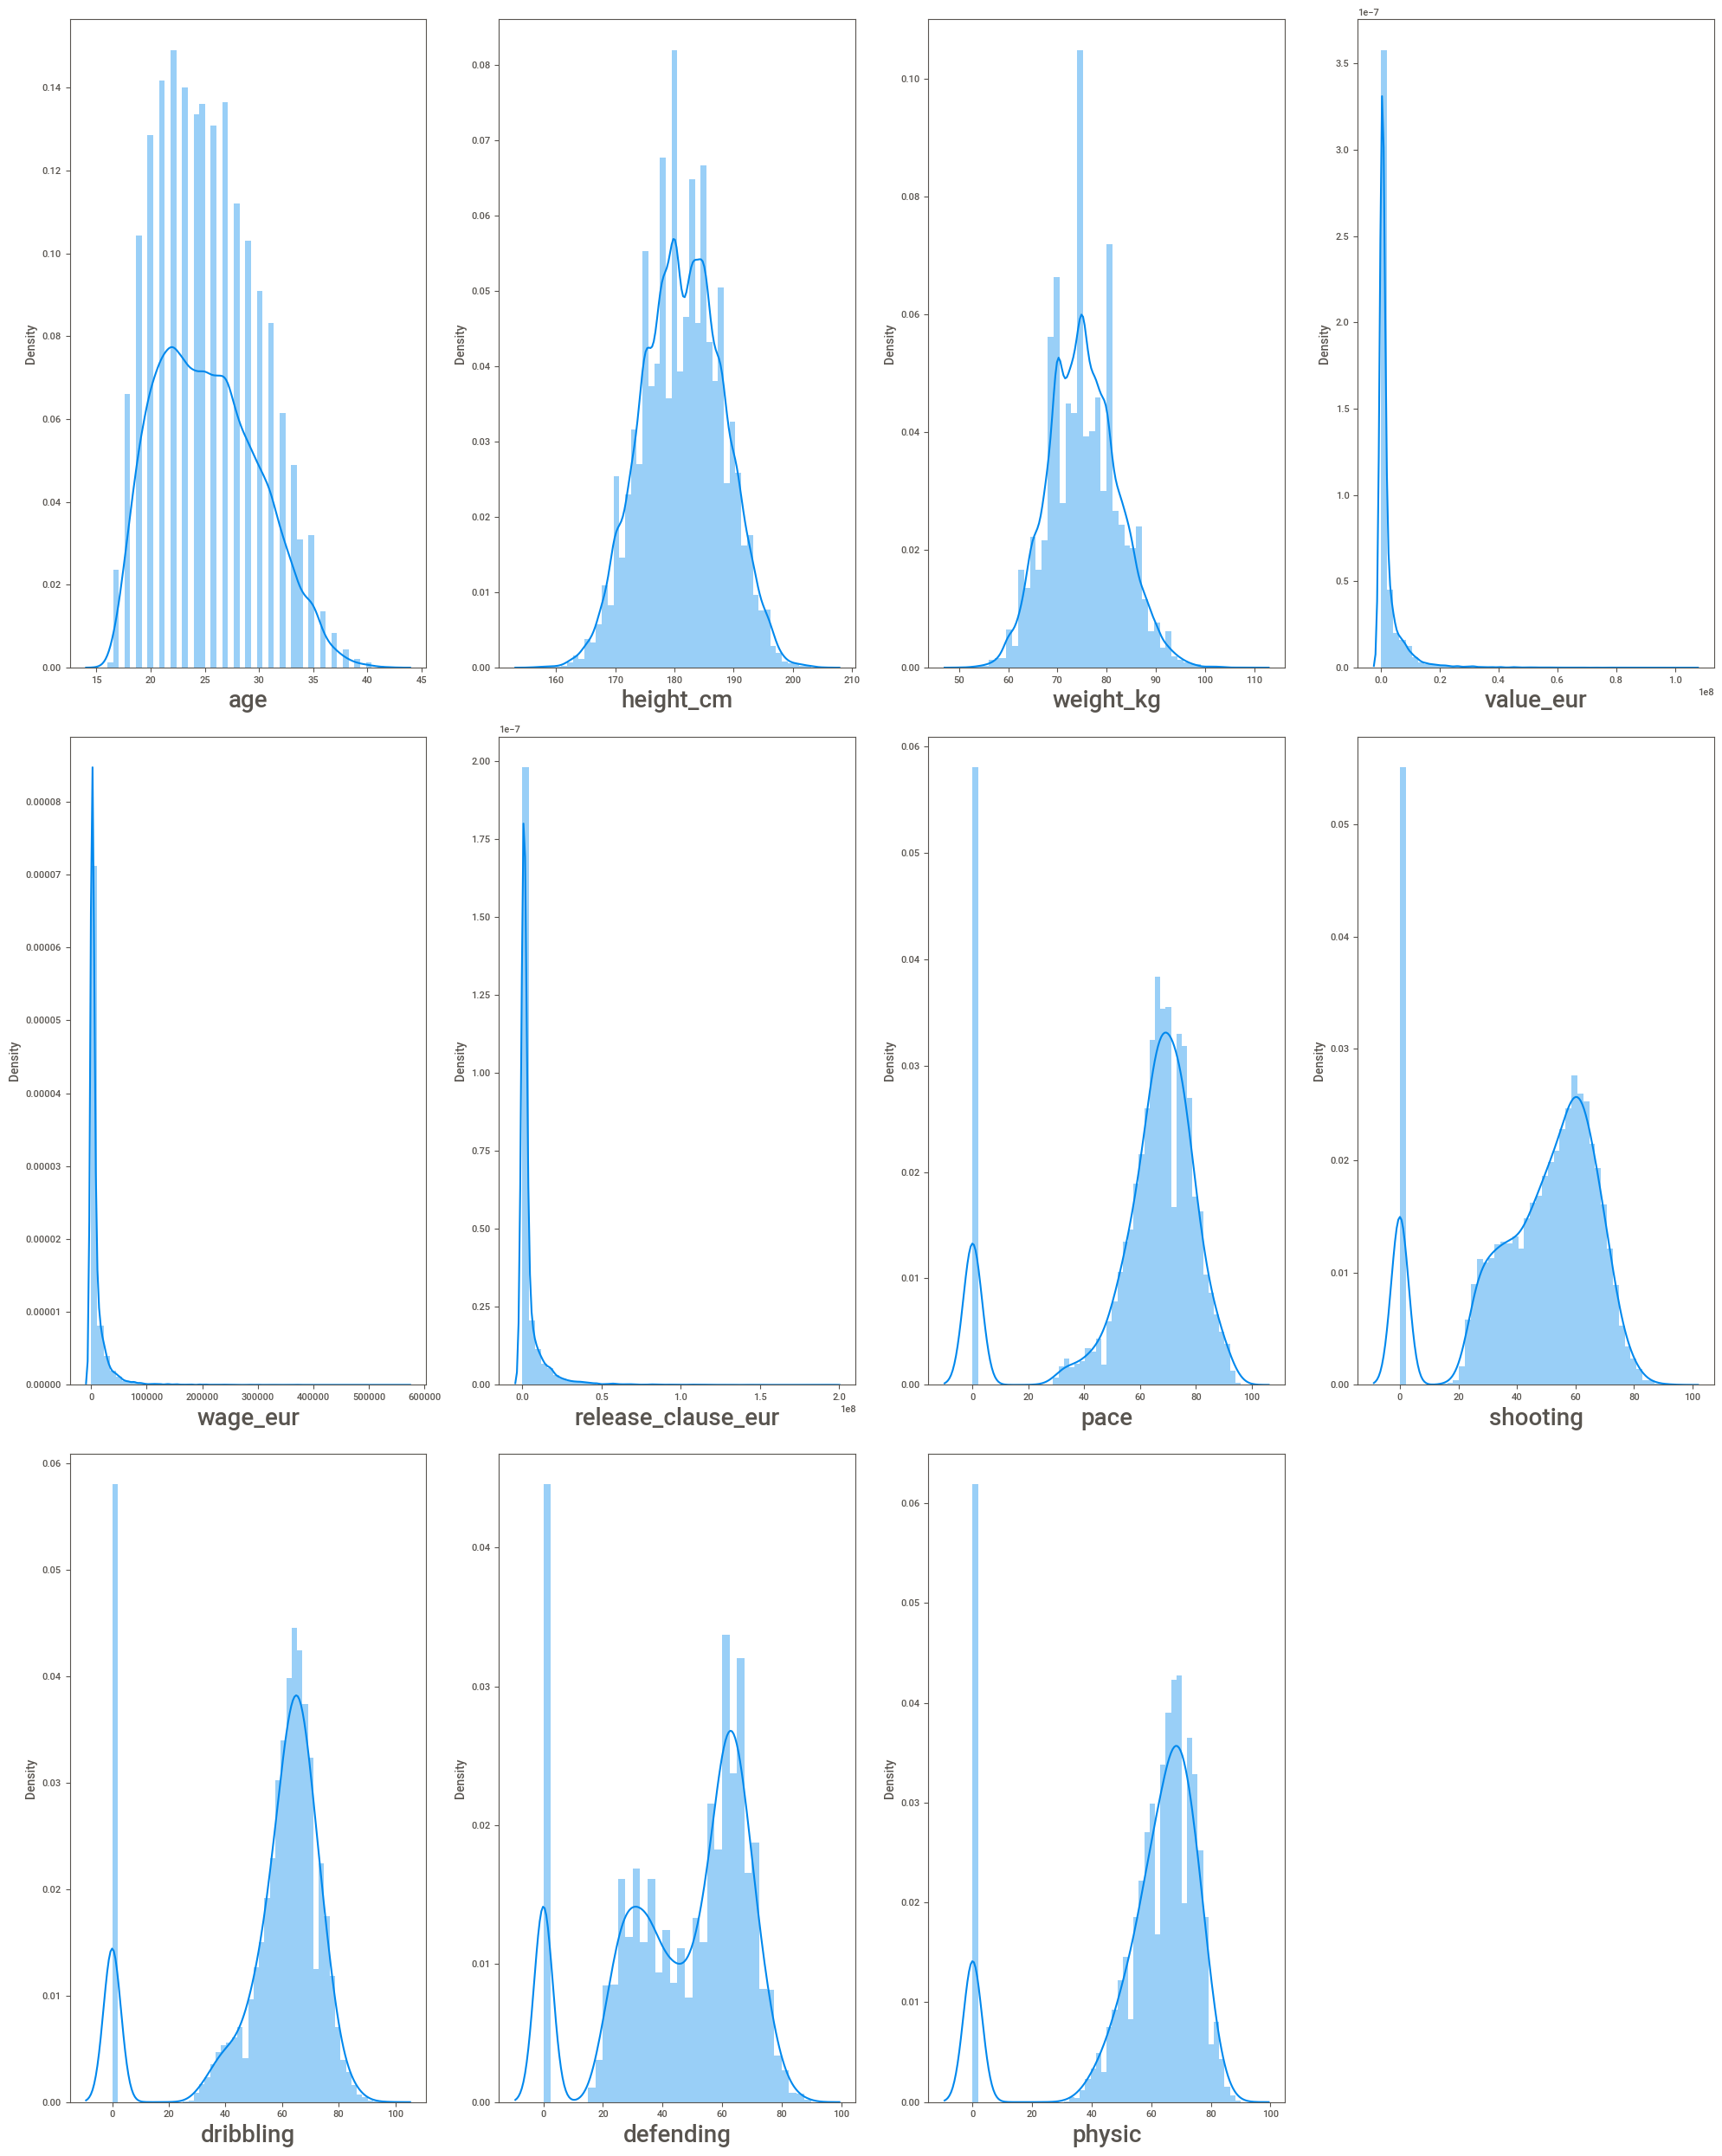

In [57]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in out1: # iteration of columns / acessing the columns from  dataset 
    if plotno<=11:    # set the limit
        plt.subplot(3,4,plotno) # # plotting 11 graphs (3-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=fifa[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

* Defending and shooting do not have outliers.


* 'age','height_cm','weight_kg','value_eur','wage_eur','release_clause_eur','pace','dribbling', and 'physic' have skewed data and outliers are present. 


* We will decide whether to impute outliers based on careful consideration of the number of outliers. If the proportion of outliers is around 4% or more, we will lean towards retaining them as they may not be indicative of entry errors. Imputing such outliers carries the risk of influencing the distribution of the data, and we aim to preserve the original characteristics of the dataset.

### Height

In [58]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(fifa['height_cm'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = fifa['height_cm'].quantile(0.25)  # first quantile
Q3 = fifa['height_cm'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 9.0
minimum limit 163.5
maximum limit 199.5


In [59]:
# Identify outliers
outliers = fifa[(fifa['height_cm'] < min_limit) | (fifa['height_cm'] > max_limit)]

print('% of outliers present in height_cm: ',len(outliers)/fifa.shape[0]*100)

% of outliers present in height_cm:  0.48692417113469744


* Outliers are around 5%.  As a general rule of thumb, we do not want to replace more than approx 4% of a data set with imputed values otherwise we risk influencing the distribution of the data. And the data does not look like data entry error as the height matches with the corresponding weight.

### Weight

In [60]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(fifa['weight_kg'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = fifa['weight_kg'].quantile(0.25)  # first quantile
Q3 = fifa['weight_kg'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)



IQR 10.0
minimum limit 55.0
maximum limit 95.0


In [61]:
# Identify outliers
outliers = fifa[(fifa['weight_kg'] < min_limit) | (fifa['weight_kg'] > max_limit)]

print('% of outliers present in weight_kg: ',len(outliers)/fifa.shape[0]*100)

% of outliers present in weight_kg:  0.39938724149250465


* Outliers are around 4%.  As a general rule of thumb, we do not want to replace more than approx 4% of a data set with imputed values otherwise we risk influencing the distribution of the data. And the data do not look like data entry error as the weight matches with the height.

### Dribbling

In [62]:
# Calculate IQR
iqr = stats.iqr(fifa['dribbling'], interpolation='midpoint')

# Calculate lower and upper bounds
Q1 = fifa['dribbling'].quantile(0.25)
Q3 = fifa['dribbling'].quantile(0.75)
min_limit = Q1 - 1.5 * iqr
max_limit = Q3 + 1.5 * iqr

print("IQR",iqr)

print('minimum limit',min_limit)

print('maximum limit',max_limit)





IQR 16.0
minimum limit 29.0
maximum limit 93.0


In [63]:
# Identify outliers
outliers = fifa[(fifa['dribbling'] < min_limit) | (fifa['dribbling'] > max_limit)]


In [64]:
print('% of outliers present in dribbling: ',len(outliers)/fifa.shape[0]*100)

% of outliers present in dribbling:  11.199255936098043


* outliers are more than 5%.  As a general rule of thumb, we do not want to replace more than 5% of a data set with imputed values otherwise we risk influencing the distribution of the data.

### Age

In [66]:
# Age is almost normally distributed. So, we use # sigma rule to find upper and lower limit
max_limit = fifa.age.mean() + 3*fifa.age.std()
print("Upper limit:",max_limit)
min_limit = fifa.age.mean() - 3*fifa.age.std()
print("Lower limit:",min_limit)


Upper limit: 39.25418488202056
Lower limit: 11.312397895088532


In [67]:
# Identify outliers
outliers = fifa[(fifa['age'] < min_limit) | (fifa['age'] > max_limit)]

print('% of outliers present in age: ',len(outliers)/fifa.shape[0]*100)

% of outliers present in age:  0.10395010395010396


In [68]:
# impute outlier on both lower and upper side with mean as the distribution looks almost normal.
fifa.loc[fifa['age'] <  min_limit,'age'] = fifa['age'].mean()
fifa.loc[fifa['age'] > max_limit,'age'] = fifa['age'].mean()

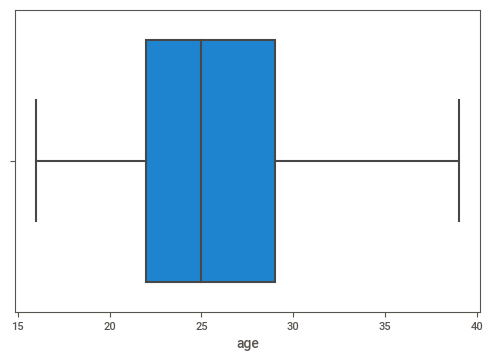

In [69]:
sns.boxplot(x=fifa['age'])
plt.show()

### pace

In [70]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(fifa['pace'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = fifa['pace'].quantile(0.25)  # first quantile
Q3 = fifa['pace'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 17.0
minimum limit 31.5
maximum limit 99.5


In [71]:
# Identify outliers
outliers = fifa[(fifa['pace'] < min_limit) | (fifa['pace'] > max_limit)]

print('% of outliers present in pace: ',len(outliers)/fifa.shape[0]*100)

% of outliers present in pace:  11.412627202100886


* As a general rule of thumb, we do not want to replace more than 5% of a data set with imputed values otherwise we risk influencing the distribution of the data.

In [ ]:

# impute outlier both lower and upper side
#fifa.loc[fifa['shooting'] <  min_limit,'shooting'] = fifa['shooting'].median()
#fifa.loc[fifa['shooting'] > max_limit,'shooting'] = fifa['shooting'].median()

### Physic

In [72]:
# Step:1 
from scipy import stats
iqr = stats.iqr(fifa['physic'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = fifa['physic'].quantile(0.25)  # first quantile
Q3 = fifa['physic'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)



IQR 16.0
minimum limit 31.0
maximum limit 95.0


In [73]:
# Identify outliers
outliers = fifa[(fifa['physic'] < min_limit) | (fifa['physic'] > max_limit)]

print('% of outliers present in physic: ',len(outliers)/fifa.shape[0]*100)

% of outliers present in physic:  11.14454535507167


* As a general rule of thumb, we do not want to replace more than 5% of a data set with imputed values otherwise we risk influencing the distribution of the data.

### value_eur

In [74]:
# Calculate IQR
iqr = stats.iqr(fifa['value_eur'], interpolation='midpoint')

# Calculate lower and upper bounds
Q1 = fifa['value_eur'].quantile(0.25)
Q3 = fifa['value_eur'].quantile(0.75)
min_limit = Q1 - 1.5 * iqr
max_limit = Q3 + 1.5 * iqr

print("IQR",iqr)

print('minimum limit',min_limit)

print('maximum limit',max_limit)


IQR 1775000.0
minimum limit -2337500.0
maximum limit 4762500.0


In [75]:
# Identify outliers
outliers = fifa[(fifa['value_eur'] < min_limit) | (fifa['value_eur'] > max_limit)]

print('% of outliers present in value_eur: ',len(outliers)/fifa.shape[0]*100)

% of outliers present in value_eur:  13.737826895721634


* As a general rule of thumb, we do not want to replace more than 5% of a data set with imputed values otherwise we risk influencing the distribution of the data.

### wage_eur

In [76]:
# Calculate IQR
iqr = stats.iqr(fifa['wage_eur'], interpolation='midpoint')

# Calculate lower and upper bounds
Q1 = fifa['wage_eur'].quantile(0.25)
Q3 = fifa['wage_eur'].quantile(0.75)
min_limit = Q1 - 1.5 * iqr
max_limit = Q3 + 1.5 * iqr

print("IQR",iqr)

print('minimum limit',min_limit)

print('maximum limit',max_limit)


IQR 7000.0
minimum limit -9500.0
maximum limit 18500.0


In [77]:

# Identify outliers
outliers = fifa[(fifa['wage_eur'] < min_limit) | (fifa['wage_eur'] > max_limit)]

print('% of outliers present in wage_eurr: ',len(outliers)/fifa.shape[0]*100)

% of outliers present in wage_eurr:  12.911697122223437


* As a general rule of thumb, we do not want to replace more than 5% of a data set with imputed values otherwise we risk influencing the distribution of the data.

### Impute 0 values of 'wage_eur' and 'value_eur'

In [78]:
fifa.loc[(fifa['value_eur']==0)|(fifa['wage_eur']==0)].head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate
327,245309,https://sofifa.com/player/245309/egidio-maestr...,E. Schetino,Egidio Maestre Schetino,27.0,1992-02-29,185,80,Uruguay,Uruguay,82,82,0,0,14,1,1,3,2,Medium/Medium,Normal,No,1200000.0,NaN,28,NaN,NaN,NaN,NaN,RCB,4.0,80.0,43.0,56.0,65.0,83.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,40,38,83,74,44,56,45,49,61,72,83,78,77,85,68,53,69,76,73,41,86,82,38,42,56,71,84,85,76,58,40,64,56,43,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,60.0,60.0,60.0,61.0,64.0,64.0,64.0,61.0,73.0,76.0,76.0,76.0,73.0,76.0,80.0,80.0,80.0,76.0,0.5,0.5
328,245313,https://sofifa.com/player/245313/jose-maria-si...,J. Sildero,José María Sildero,27.0,1992-02-29,177,75,Uruguay,Uruguay,82,82,0,0,7,1,1,4,4,Medium/Low,Normal,No,1200000.0,NaN,28,NaN,NaN,NaN,NaN,RM,17.0,81.0,77.0,81.0,82.0,40.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,"Long Throw-in, Selfish, Argues with Officials,...",75,74,64,83,76,83,86,78,82,80,88,75,83,82,76,82,64,80,70,78,62,40,80,83,77,81,40,35,33,12,12,13,15,13,77.0,77.0,77.0,80.0,80.0,80.0,80.0,80.0,81.0,81.0,81.0,80.0,77.0,77.0,77.0,80.0,63.0,62.0,62.0,62.0,63.0,59.0,52.0,52.0,52.0,59.0,0.5,0.0
407,245299,https://sofifa.com/player/245299/jaime-nicolas...,J. Frendado,Jaime Nicolás Frendado,35.0,1984-02-29,181,82,Uruguay,Uruguay,81,81,0,0,14,1,1,3,2,High/Medium,Normal,No,1200000.0,NaN,28,NaN,NaN,NaN,NaN,LCB,5.0,71.0,61.0,57.0,62.0,82.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,Long Passer (CPU AI Only),40,56,80,67,63,60,72,58,58,64,67,74,61,76,63,74,91,60,77,61,86,82,58,50,62,70,83,82,82,58,62,54,71,48,66.0,66.0,66.0,60.0,63.0,63.0,63.0,60.0,61.0,61.0,61.0,60.0,63.0,63.0,63.0,60.0,69.0,72.0,72.0,72.0,69.0,72.0,80.0,80.0,80.0,72.0,1.0,0.5


In [79]:
# imputing the 0 in 'value_eur' and 'wage_eur' as there cannot be 0 price for players.
fifa.value_eur.replace(0,np.median(fifa.value_eur),inplace =True)
fifa.wage_eur.replace(0,np.median(fifa.wage_eur),inplace =True)

In [80]:
# check the imputed values of the player at the 327
fifa.iloc[[327,]]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate
327,245309,https://sofifa.com/player/245309/egidio-maestr...,E. Schetino,Egidio Maestre Schetino,27.0,1992-02-29,185,80,Uruguay,Uruguay,82,82,700000.0,3000.0,14,1,1,3,2,Medium/Medium,Normal,No,1200000.0,NaN,28,NaN,NaN,NaN,NaN,RCB,4.0,80.0,43.0,56.0,65.0,83.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,40,38,83,74,44,56,45,49,61,72,83,78,77,85,68,53,69,76,73,41,86,82,38,42,56,71,84,85,76,58,40,64,56,43,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,60.0,60.0,60.0,61.0,64.0,64.0,64.0,61.0,73.0,76.0,76.0,76.0,73.0,76.0,80.0,80.0,80.0,76.0,0.5,0.5


In [81]:
# check if the imputation has happened
fifa.loc[(fifa['value_eur']==0)|(fifa['wage_eur']==0)].head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


### release_clause_eur

In [82]:
# Calculate IQR
iqr = stats.iqr(fifa['release_clause_eur'], interpolation='midpoint')

# Calculate lower and upper bounds
Q1 = fifa['release_clause_eur'].quantile(0.25)
Q3 = fifa['release_clause_eur'].quantile(0.75)
min_limit = Q1 - 1.5 * iqr
max_limit = Q3 + 1.5 * iqr

print("IQR",iqr)

print('minimum limit',min_limit)

print('maximum limit',max_limit)

IQR 2604000.0
minimum limit -3310000.0
maximum limit 7106000.0


In [83]:
# Identify outliers
outliers = fifa[(fifa['release_clause_eur'] < min_limit) | (fifa['release_clause_eur'] > max_limit)]

print('% of outliers present in release_clause_eur: ',len(outliers)/fifa.shape[0]*100)

% of outliers present in release_clause_eur:  15.368202210307475


* As a general rule of thumb, we do not want to replace more than 5% of a data set with imputed values otherwise we risk influencing the distribution of the data.

In [84]:

out2=fifa[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing','attacking_finishing',
           'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys','skill_dribbling', 'skill_curve','skill_fk_accuracy',
           'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
           'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping','power_stamina','power_strength','power_long_shots',
           'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
           'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
           'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]


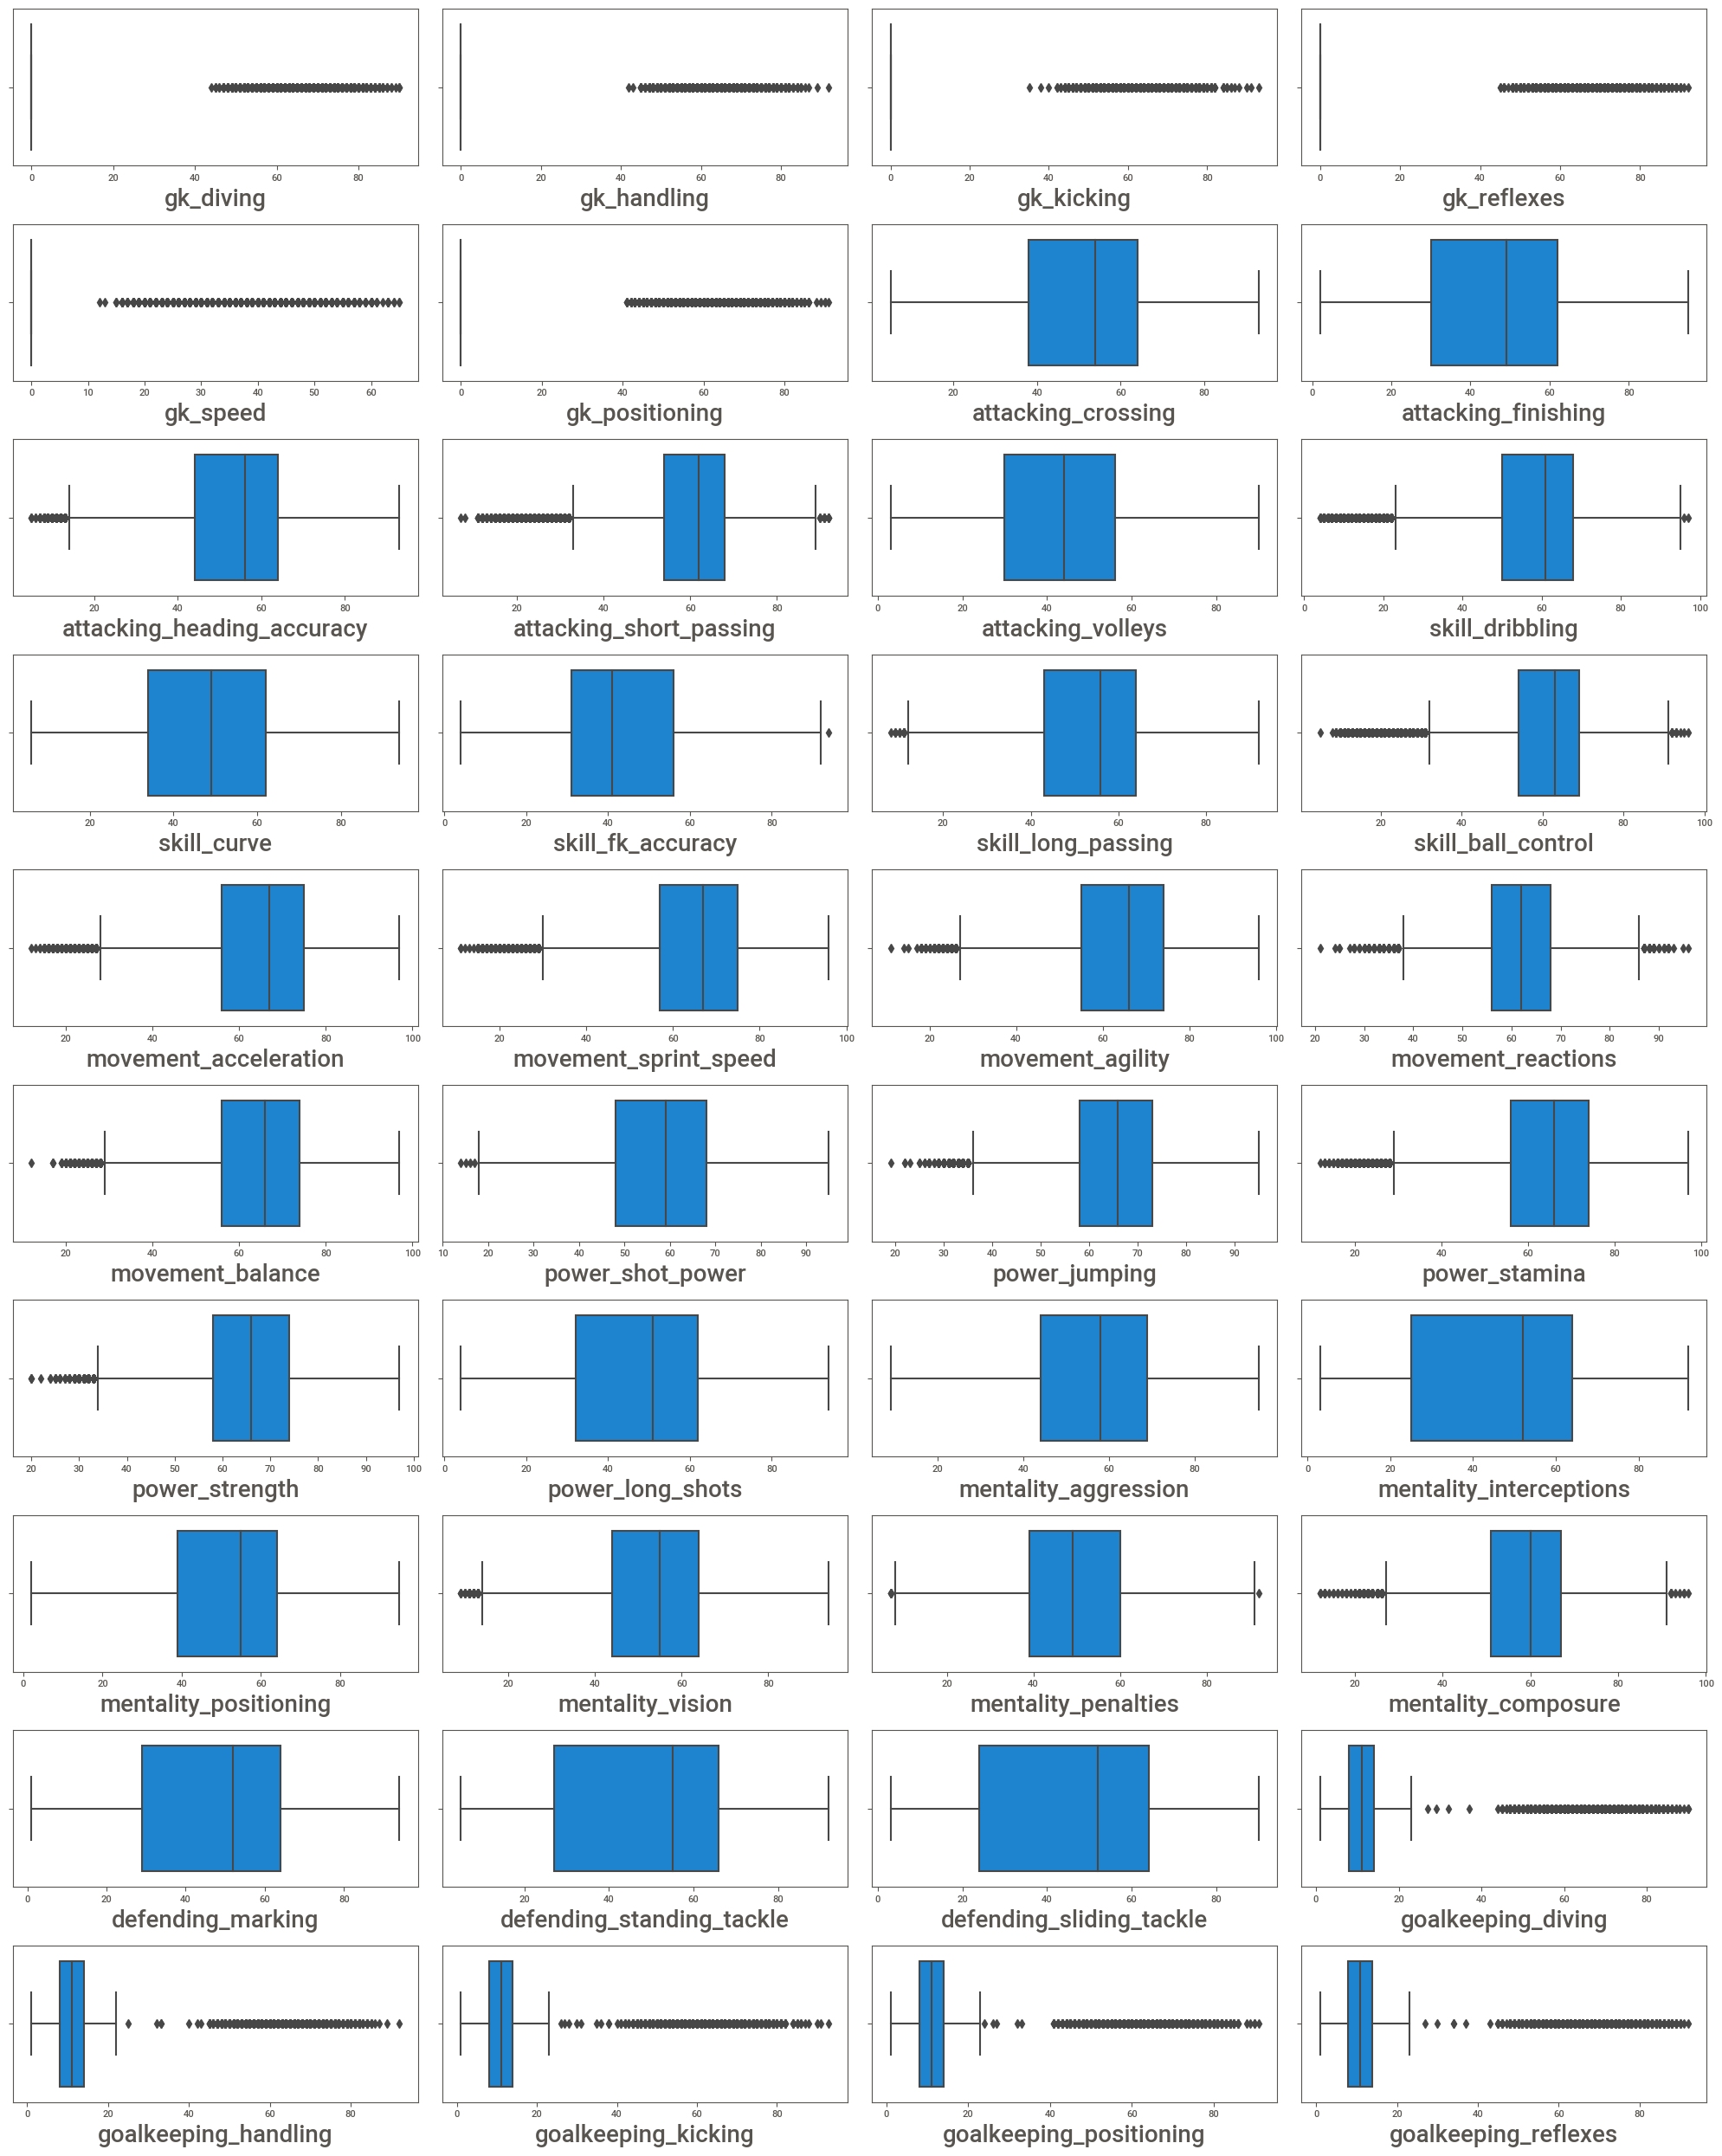

In [85]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in out2: # iteration of columns / acessing the columns from  dataset 
    if plotno<=40:    # set the limit
        plt.subplot(10,4,plotno) # # plotting 36 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.boxplot(x=fifa[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

*  #### We take only 'attacking_heading_accuracy', 'skill_fk_accuracy', 'skill_long_passing', 'power_shot_power', 'mentality_vision',  'mentality_penalties' out of out2 to check the distribution because the rest of them either have no outliers or too many outliers.

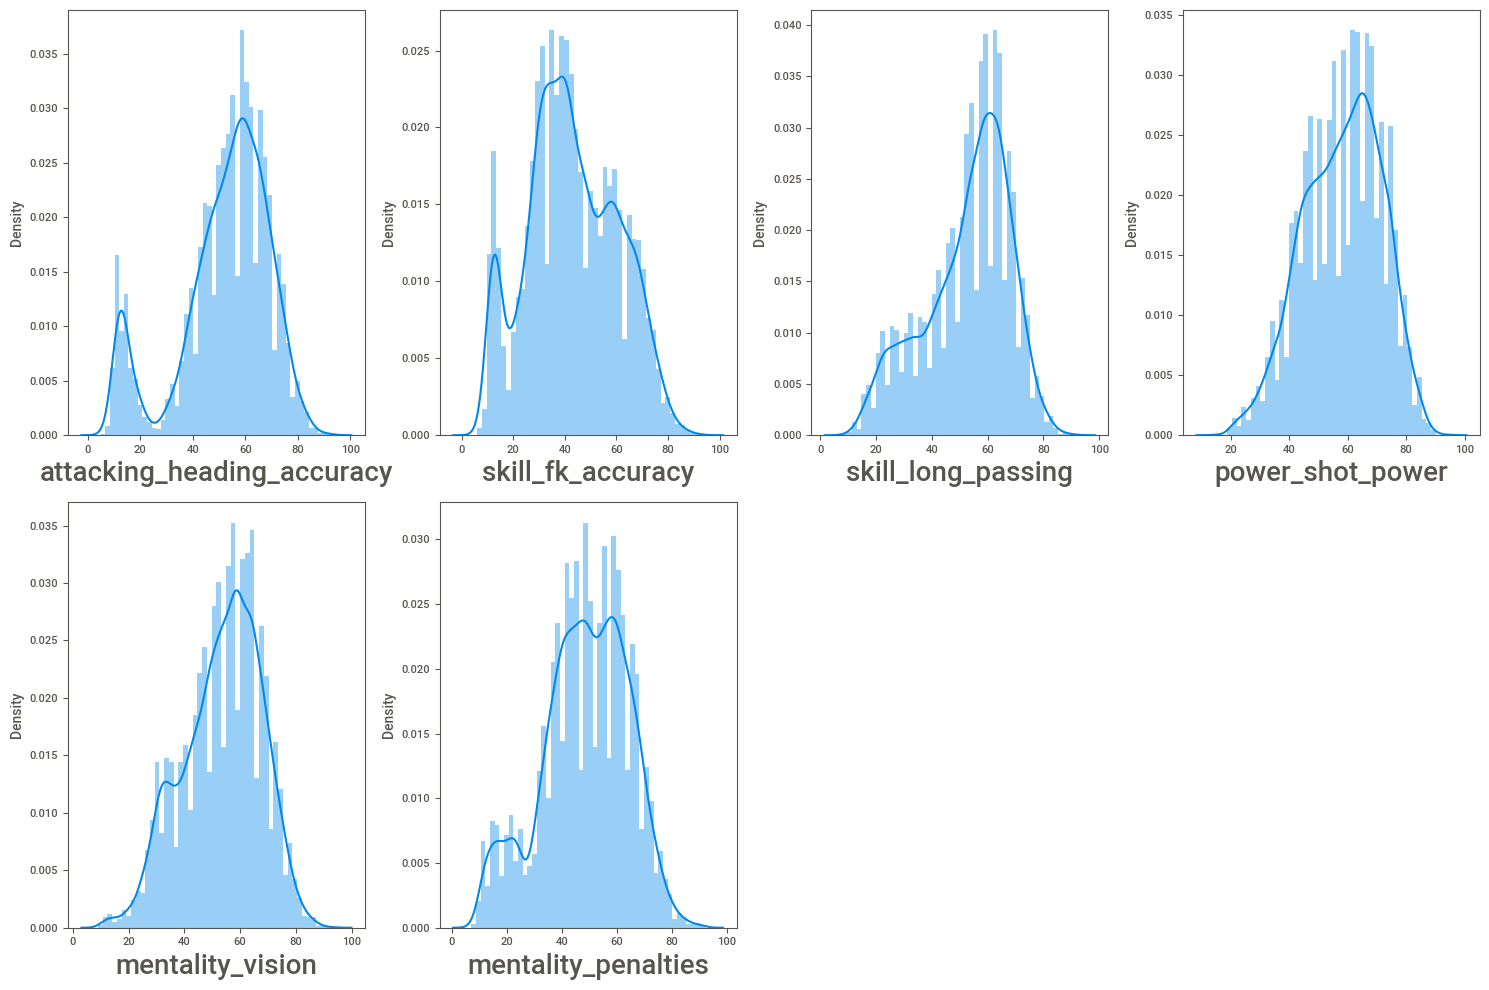

In [86]:
out2_1=fifa[['attacking_heading_accuracy','skill_fk_accuracy', 'skill_long_passing', 'power_shot_power', 
             'mentality_vision', 'mentality_penalties']]

plt.figure(figsize=(15,10)) # defining canvas size
plotno = 1 # counter

for column in out2_1: 
    if plotno<=7:   
        plt.subplot(2,4,plotno) 
        sns.distplot(x=fifa[column])  
        plt.xlabel(column,fontsize=20)
    plotno+=1 
plt.tight_layout()
plt.show()

* Since all the plots are somewhat skewed, we use iqr to calculate min limit and max limit

In [87]:
for column in out2_1:
   # max_limit = fifa[column].mean() + 3*fifa[column].std()

    #min_limit = fifa[column].mean() - 3*fifa[column].std()

    # Calculate IQR
    iqr = stats.iqr(fifa[column], interpolation='midpoint')

    # Calculate lower and upper bounds
    Q1 = fifa[column].quantile(0.25)
    Q3 = fifa[column].quantile(0.75)
    min_limit = Q1 - 1.5 * iqr
    max_limit = Q3 + 1.5 * iqr

    # Identify outliers
    outliers = fifa[(fifa[column] < min_limit) | (fifa[column] > max_limit)]
    display(outliers.head(2))

    print(f'% of outliers present in {column}: {len(outliers)/fifa.shape[0]*100}')

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27.0,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000.0,250000.0,11,1,3,4,1,Medium/Medium,Normal,Yes,143400000.0,NaN,26,1.0,NaN,2014-07-01,2022.0,SUB,22.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5
28,192119,https://sofifa.com/player/192119/thibaut-court...,T. Courtois,Thibaut Courtois,27.0,1992-05-11,199,96,Belgium,Real Madrid,88,89,48000000.0,235000.0,11,0,4,2,1,Medium/Medium,Courtois,Yes,102000000.0,NaN,26,13.0,NaN,2018-08-09,2024.0,GK,1.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,89.0,72.0,87.0,49.0,85.0,"Flair, Acrobatic Clearance",14,14,13,33,12,13,19,20,35,23,46,52,61,83,45,54,68,38,70,17,23,15,13,44,27,66,20,18,16,85,89,72,85,87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5


% of outliers present in attacking_heading_accuracy: 5.843090053616369


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32.0,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000.0,565000.0,3,0,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",9,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,92.0,87.0,87.0,87.0,92.0,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0,0.5,0.0


% of outliers present in skill_fk_accuracy: 0.00547105810263705


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate
1111,194781,https://sofifa.com/player/194781/renan-ribeiro...,Renan Ribeiro,Renan Ribeiro,29.0,1990-03-23,193,87,Brazil,Sporting CP,77,78,7000000.0,11000.0,11,1,1,2,1,Medium/Medium,Normal,No,14500000.0,NaN,26,1.0,NaN,2019-01-31,2023.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,81.0,70.0,67.0,80.0,49.0,75.0,Second Wind,12,12,16,19,9,14,18,11,11,19,50,48,59,76,29,50,74,30,70,12,13,26,11,56,14,48,18,18,12,81,70,67,75,80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5
3263,230330,https://sofifa.com/player/230330/nivaldo-mateu...,Nivo Serpinho,Nivaldo Mateus Serpa Pombal,35.0,1984-02-29,185,78,Brazil,Chapecoense,73,73,1100000.0,7000.0,11,0,1,3,1,Medium/Medium,Normal,No,2100000.0,NaN,26,1.0,NaN,2015-02-01,2022.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,72.0,75.0,69.0,72.0,54.0,73.0,NaN,8,6,13,12,12,18,22,10,10,23,59,49,62,64,64,52,52,25,60,9,37,16,6,70,15,58,20,11,9,72,75,69,73,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5


% of outliers present in skill_long_passing: 0.07112375533428165


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate
4330,210964,https://sofifa.com/player/210964/federico-cecc...,F. Ceccherini,Federico Ceccherini,27.0,1992-05-11,187,75,Italy,Fiorentina,71,73,2500000.0,26000.0,14,1,1,2,2,Medium/Medium,Normal,No,4400000.0,NaN,28,17.0,NaN,2018-07-16,2022.0,NaN,NaN,53.0,15.0,34.0,50.0,71.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,15,17,58,58,14,42,13,19,45,56,54,52,59,70,59,15,80,60,86,12,65,72,13,13,13,63,71,75,74,8,13,11,10,9,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,40.0,40.0,40.0,41.0,46.0,46.0,46.0,41.0,58.0,63.0,63.0,63.0,58.0,61.0,70.0,70.0,70.0,61.0,0.5,0.5
4634,204406,https://sofifa.com/player/204406/gabriel-achil...,G. Achilier,Gabriel Eduardo Achilier Zurita,34.0,1985-03-24,179,85,Ecuador,Monarcas Morelia,71,71,875000.0,7000.0,14,1,1,2,2,Medium/Medium,Normal,No,1500000.0,NaN,25,24.0,NaN,2017-01-01,2023.0,NaN,NaN,42.0,19.0,43.0,46.0,72.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,Avoids Using Weaker Foot,49,18,71,51,21,43,36,30,37,53,46,38,35,65,42,16,76,70,83,17,68,74,28,32,35,54,70,74,70,15,8,13,15,9,40.0,40.0,40.0,41.0,39.0,39.0,39.0,41.0,40.0,40.0,40.0,44.0,47.0,47.0,47.0,44.0,60.0,61.0,61.0,61.0,60.0,62.0,70.0,70.0,70.0,62.0,0.5,0.5


% of outliers present in power_shot_power: 0.0218842324105482


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate
1374,216939,https://sofifa.com/player/216939/andre-blake/2...,A. Blake,Andre Blake,28.0,1990-11-21,193,79,Jamaica,Philadelphia Union,76,79,7000000.0,7000.0,11,1,1,2,1,Medium/Medium,Lean,Yes,11000000.0,NaN,26,18.0,NaN,2014-01-16,2019.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,78.0,71.0,68.0,83.0,46.0,74.0,Acrobatic Clearance,12,13,24,32,11,11,24,12,33,28,43,49,48,71,42,51,70,41,68,11,27,15,12,11,19,55,14,14,13,78,71,68,74,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5
2844,209990,https://sofifa.com/player/209990/richard-streb...,R. Strebinger,Richard Strebinger,26.0,1993-02-14,194,90,Austria,SK Rapid Wien,73,76,3600000.0,11000.0,11,1,1,2,1,Medium/Medium,Normal,No,5700000.0,NaN,26,1.0,NaN,2015-07-01,2022.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,74.0,64.0,63.0,79.0,38.0,74.0,Acrobatic Clearance,15,14,16,26,12,12,17,13,21,20,37,38,39,74,33,47,66,30,78,14,20,15,13,12,23,28,14,13,12,74,64,63,74,79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5


% of outliers present in mentality_vision: 0.2790239632344896


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate
217,183574,https://sofifa.com/player/183574/max-kruse/20/...,M. Kruse,Max Kruse,31.0,1988-03-19,180,76,Germany,Fenerbahçe SK,83,83,23500000.0,105000.0,2,0,2,4,4,High/Medium,Normal,Yes,44700000.0,NaN,16,10.0,NaN,2019-07-04,2022.0,NaN,NaN,66.0,83.0,83.0,83.0,45.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,"Finesse Shot, Crowd Favourite",81,84,63,85,80,83,82,69,82,86,67,65,74,85,77,81,65,73,73,79,62,34,85,85,92,87,57,38,29,12,7,5,13,9,79.0,79.0,79.0,81.0,81.0,81.0,81.0,81.0,82.0,82.0,82.0,81.0,78.0,78.0,78.0,81.0,63.0,64.0,64.0,64.0,63.0,59.0,54.0,54.0,54.0,59.0,1.0,0.5
14528,120041,https://sofifa.com/player/120041/xavier-pinote...,X. Pinoteau,Xavier Pinoteau,36.0,1983-02-12,188,80,France,FC Chambly Oise,61,61,40000.0,1000.0,11,1,1,3,1,Medium/Medium,Normal,No,70000.0,NaN,28,1.0,NaN,2016-07-01,2020.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,60.0,65.0,56.0,55.0,30.0,65.0,NaN,16,9,14,13,18,20,13,18,25,35,27,33,28,55,35,42,36,22,59,16,17,12,8,31,7,24,16,10,13,60,65,56,65,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5


% of outliers present in mentality_penalties: 0.0328263486158223


* #### attacking_heading_accuracy have more than 5% outliers.
  
* #### In all other features, the outliers ,beyond lower limit or upper limit , look genuine when we check their international reputation and overall points. So we are not imputing them.

In [88]:

out3=fifa[['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
     'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']]

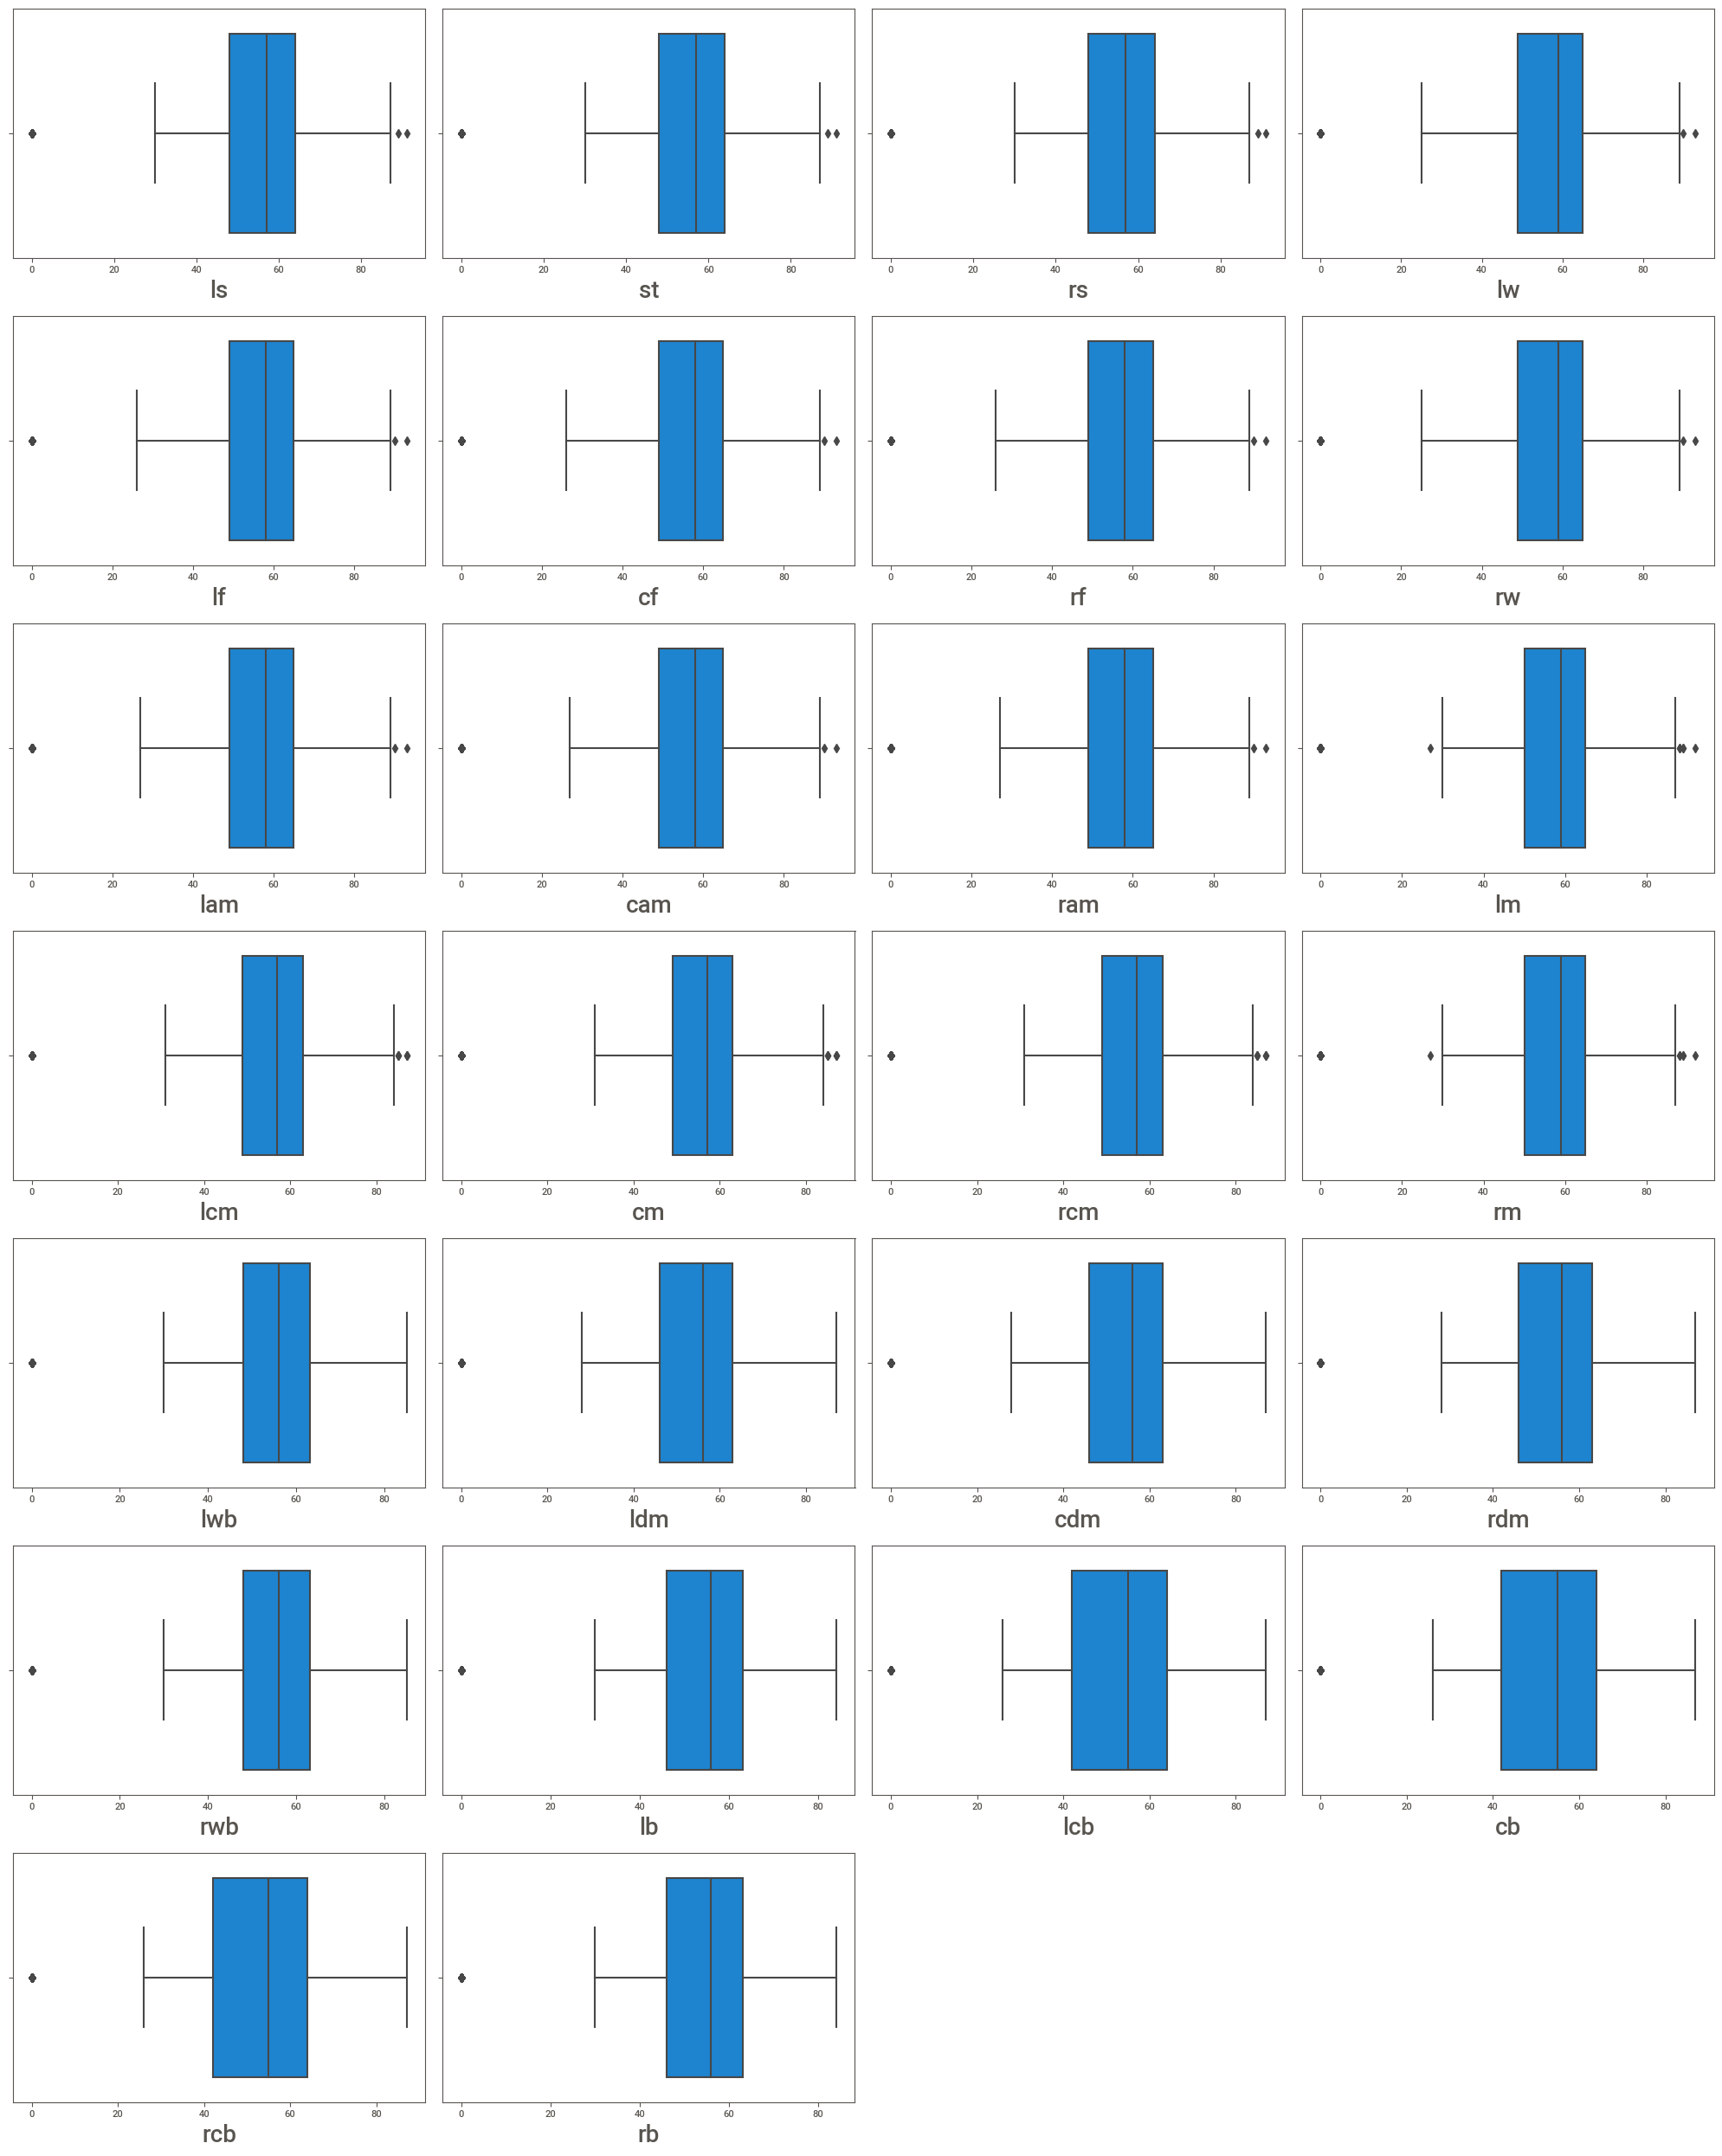

In [89]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in out3: # iteration of columns / acessing the columns from  dataset 
    if plotno<=28:    # set the limit
        plt.subplot(7,4,plotno) # # plotting 26 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.boxplot(x=fifa[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

* #### the 0 in the plots are not outliers.

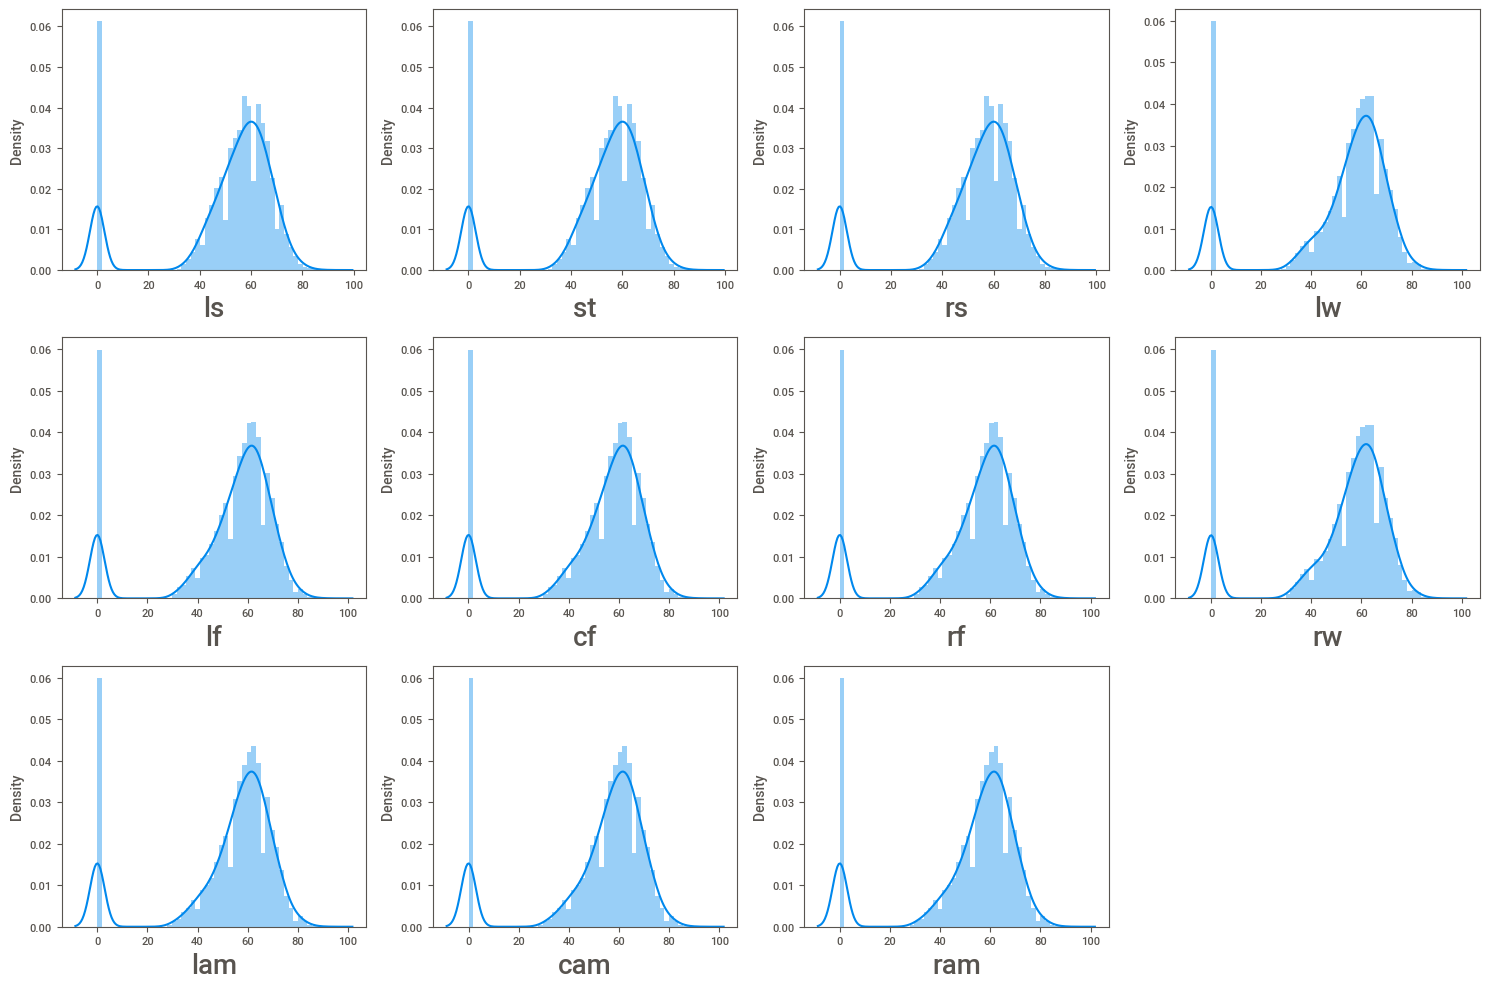

In [90]:
# To check the other outliers in the columns, we plot their distribution plot
out3_1=fifa[['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm']]
plt.figure(figsize=(15,10)) # defining canvas size
plotno = 1 # counter

for column in out3_1: # iteration of columns / acessing the columns from  dataset 
    if plotno<=11:    # set the limit
        plt.subplot(3,4,plotno) # # plotting 11 graphs (3-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=fifa[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

In [91]:
from IPython.display import display

# since all the plots are normally distributed we use 3 sigma to calculate min limit and max limit
for column in out3_1:
    max_limit = fifa[column].mean() + 3*fifa[column].std()

    min_limit = fifa[column].mean() - 3*fifa[column].std()

    # Identify outliers
    outliers = fifa[(fifa[column] < min_limit) | (fifa[column] > max_limit)]
    display(outliers.head(1))

    print(f'% of outliers present in {column}: {len(outliers)/fifa.shape[0]*100}')

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in ls: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in st: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in rs: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in lw: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in lf: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in cf: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in rf: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in rw: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in lam: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in cam: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in ram: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in lm: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in lcm: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in cm: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in rcm: 0.0


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate


% of outliers present in rm: 0.0


* #### The outliers in the boxplots are actually not outliers.

In [92]:
names = fifa.short_name.tolist()

# FEATURE SCALING AND FEATURE SELECTION

### MIN-MAX SCALING

* Scale the feature between 0 to 1


* Use min max scaling because of dataset contain large amount of outlier so outlier is going to be biased.

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [94]:
column_list = fifa.columns.tolist()
print(column_list)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [95]:
# We remove following columns as they do not contribute much to skills
d1=['age','sofifa_id', 'player_url', 'short_name', 'long_name', 'dob','nationality', 'club', 'overall', 
    'potential','international_reputation','work_rate','body_type', 'real_face','player_tags',
    'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 
    'nation_jersey_number','player_traits'] 
minmaxscaled_data=scaler.fit_transform(fifa.drop(d1,axis=1))

In [96]:
data1=pd.DataFrame(minmaxscaled_data,columns=['height_cm', 'weight_kg','value_eur', 'wage_eur', 'player_positions',
                                  'preferred_foot','weak_foot', 'skill_moves','release_clause_eur','team_position',
                                 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 
                                  'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
                                 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                                  'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 
                                  'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
                                  'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
                                  'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
                                  'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
                                  'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
                                  'mentality_penalties', 'mentality_composure', 'defending_marking', 
                                  'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
                                  'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
                                  'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
                                  'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 
                                  'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'AttackWorkRate', 'DefenseWorkRate'])

In [97]:
data1.head(1)

,height_cm,weight_kg,value_eur,wage_eur,player_positions,preferred_foot,weak_foot,skill_moves,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate
0,0.285714,0.366667,0.905204,1.0,0.214286,0.0,0.75,0.75,1.0,0.321429,0.90625,0.989247,1.0,1.0,0.433333,0.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.943182,1.0,0.738636,1.0,0.977011,1.0,0.988636,1.0,1.0,1.0,0.929412,0.858824,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,1.0,0.453488,0.41573,0.989247,1.0,0.8,1.0,0.344086,0.367816,0.264368,0.05618,0.10989,0.152174,0.144444,0.076923,0.978022,0.978022,0.978022,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8,0.758621,0.758621,0.758621,0.8,0.75,0.597701,0.597701,0.597701,0.75,0.5,0.0


In [98]:
fifa.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,AttackWorkRate,DefenseWorkRate
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32.0,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000.0,565000.0,3,0,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",9,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,92.0,87.0,87.0,87.0,92.0,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0,0.5,0.0


In [99]:
data1.shape

(18278, 84)

In [ ]:
# pip install fast_ml

### Check duplicate features

In [100]:

from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features

get_duplicate_features(data1)

,Desc,feature1,feature2
0,Duplicate Values,ls,st
1,Duplicate Values,ls,rs
2,Duplicate Values,lw,rw
3,Duplicate Values,lf,cf
4,Duplicate Values,lf,rf
5,Duplicate Values,lam,cam
6,Duplicate Values,lam,ram
7,Duplicate Values,lm,rm
8,Duplicate Values,lcm,cm
9,Duplicate Values,lcm,rcm


* #### Features ls, lw, lf, lam, lm, lcm, lwb, ldm, lb, lcb listed in feature1 are the features to be considered

*   #### Features listed in feature2 are to be deleted

In [101]:
d2 = ['st', 'rs', 'rw', 'cf', 'rf', 'cam', 'ram', 'rm','cm', 'rcm', 'rwb', 'cdm', 'rdm', 'rb', 'cb', 'rcb']

In [102]:

data2 = data1.drop(d2, axis=1)

In [103]:
data2.shape

(18278, 68)

In [104]:
X=data2.loc[:,:]

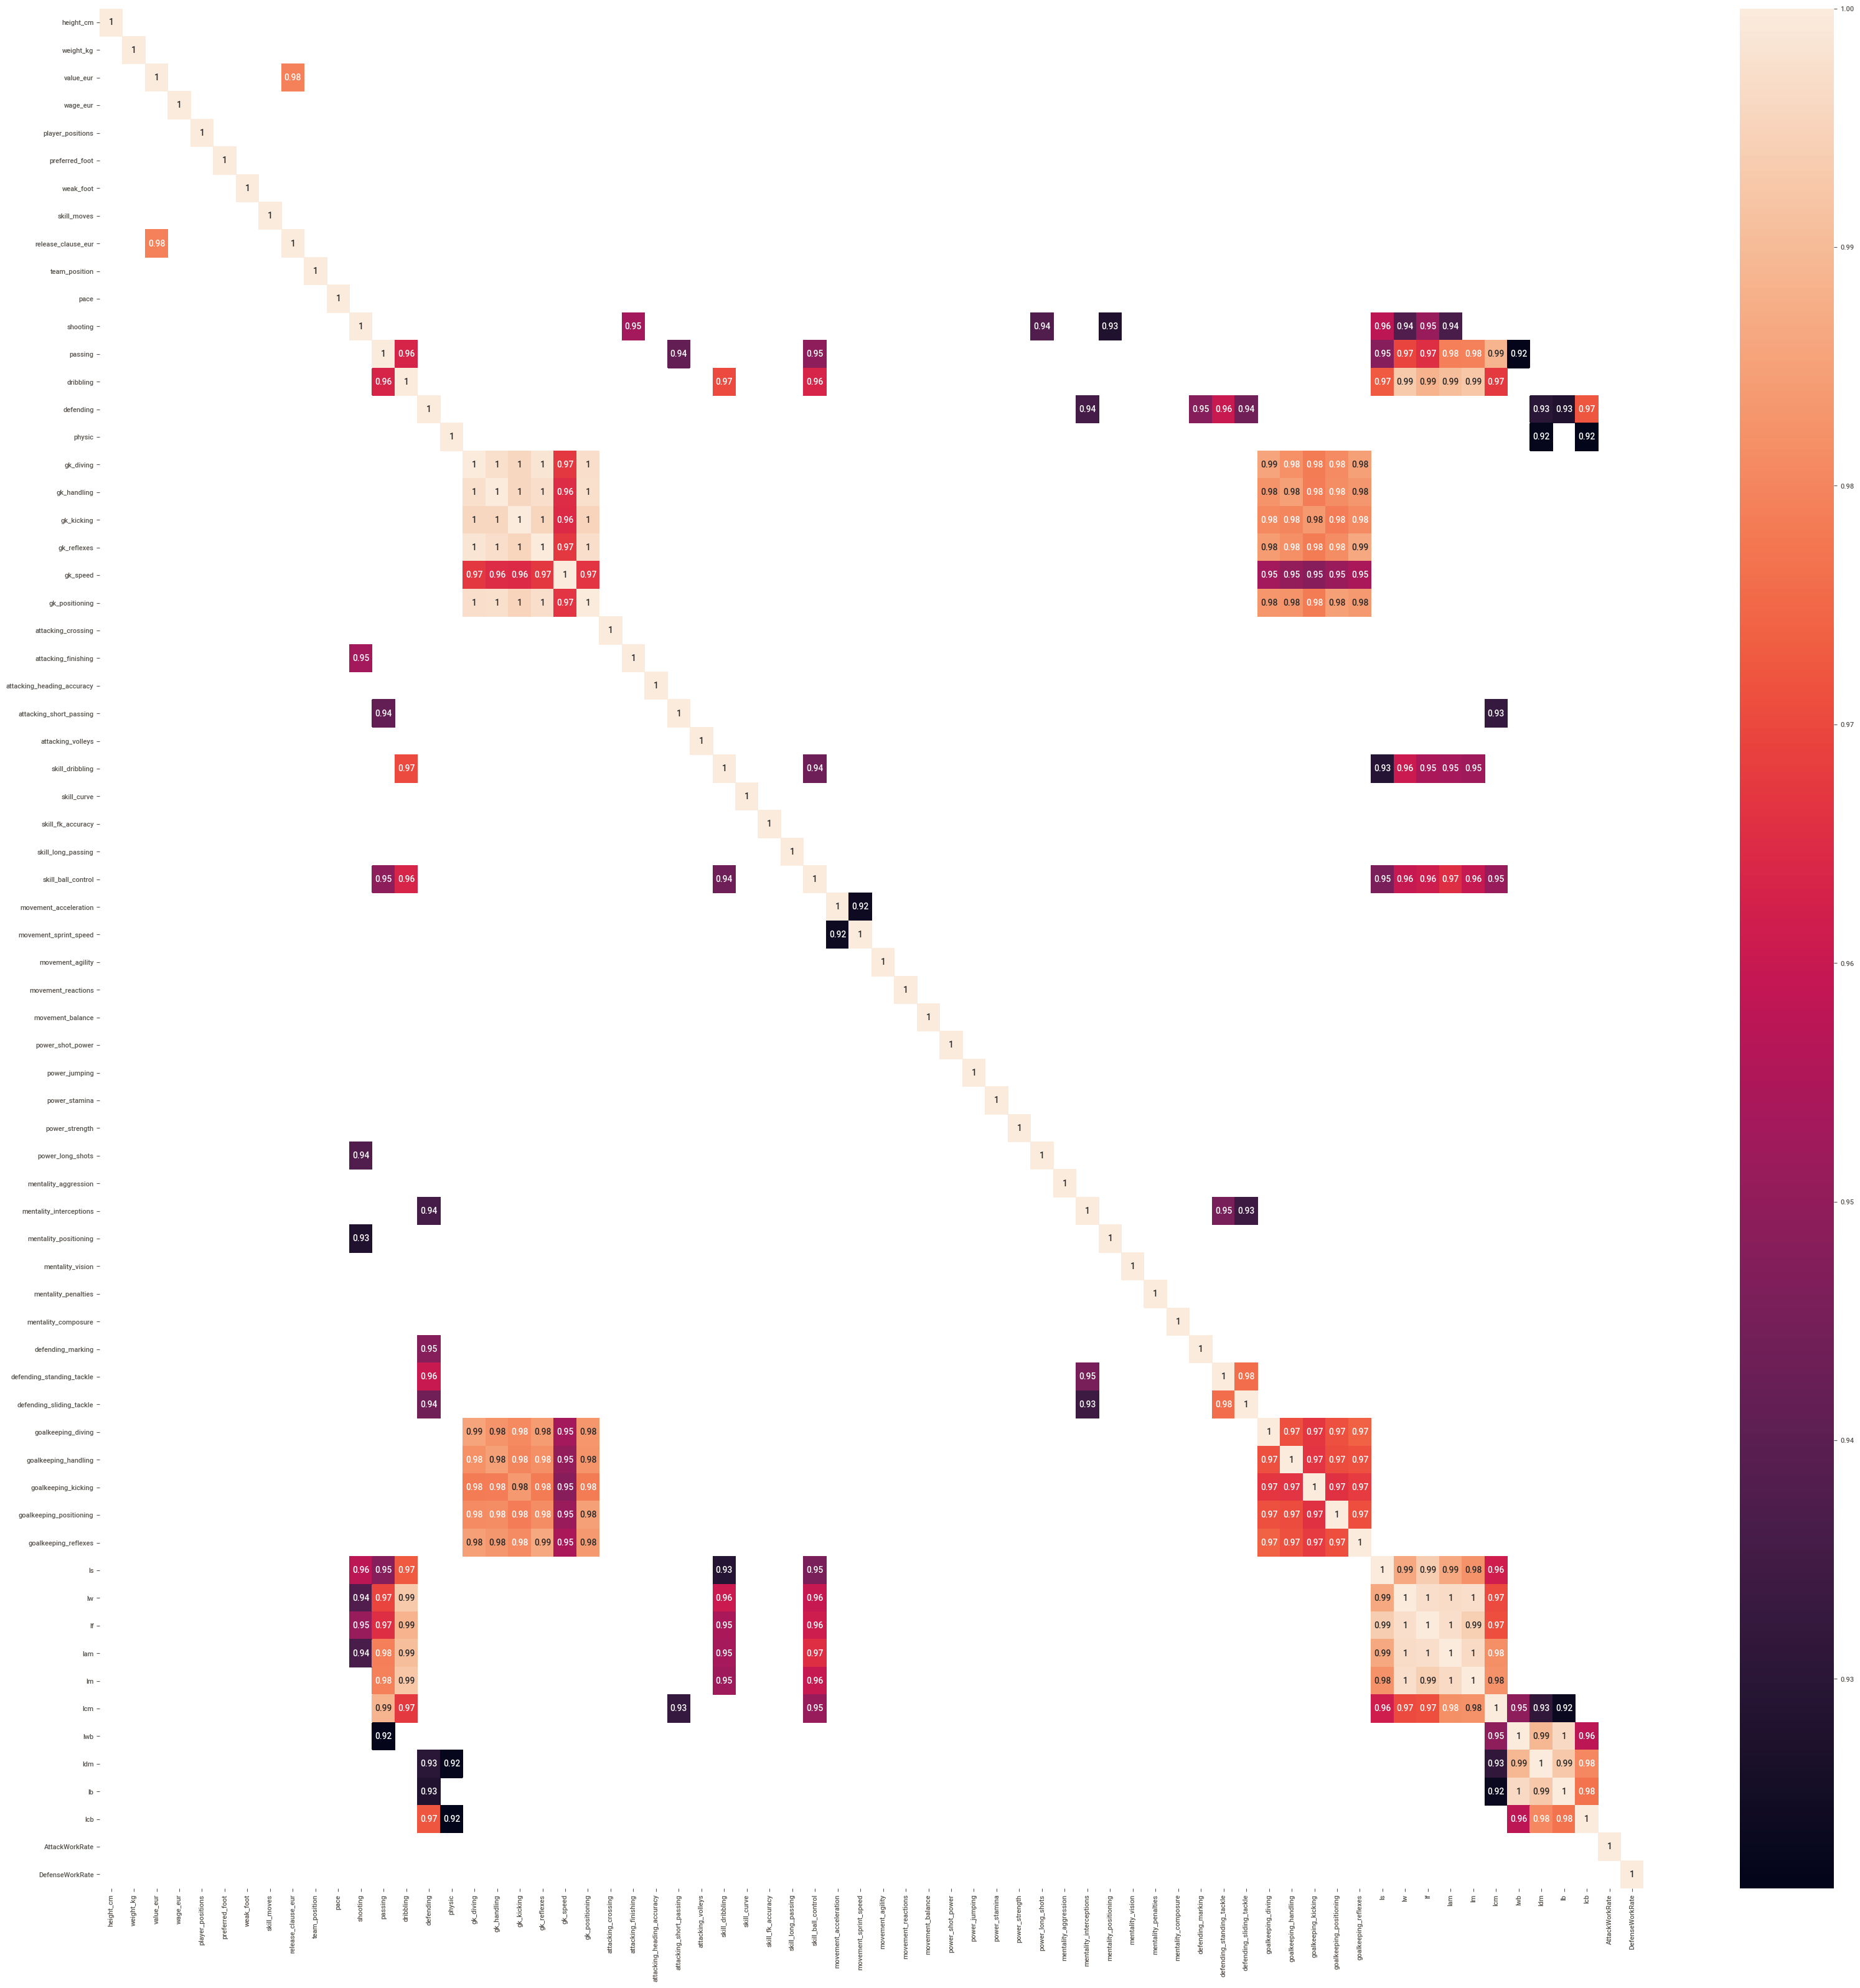

In [105]:
# Plot heatmap with features more than 0.92 correlated
plt.figure(figsize=(40,40))
sns.heatmap(X.corr()[X.corr()>0.92], annot=True)
plt.show()

* ####  When there are too many features, it is difficult to find the highly correlated ones.

In [106]:
# checking highly correlated features that are above 0.92
pd.set_option('display.max_rows',None)
corrmat = X.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.92]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat

,feature1,feature2,corr
0,gk_diving,gk_reflexes,0.998654
1,gk_reflexes,gk_diving,0.998654
2,gk_positioning,gk_handling,0.997719
3,gk_handling,gk_positioning,0.997719
4,gk_handling,gk_diving,0.997603
5,gk_diving,gk_handling,0.997603
6,lam,lf,0.997436
7,lf,lam,0.997436
8,lw,lm,0.997397
9,lm,lw,0.997397


In [107]:
pd.reset_option('display.max_rows',None)

In [109]:
# The following features are highly correlated with some of the festures in the dataset. So removing them.
d3=['gk_diving', 'gk_reflexes', 'gk_positioning', 'gk_handling', 
'gk_speed','lf', 'lw','lm','lb','gk_kicking','lam','lwb','ls','lcm','lcb', 'ldm','defending_standing_tackle',
'attacking_finishing','defending_marking','release_clause_eur','defending_sliding_tackle', 'goalkeeping_kicking',
'power_long_shots','attacking_short_passing','goalkeeping_reflexes',
'goalkeeping_positioning','goalkeeping_handling',
'mentality_interceptions','mentality_positioning','movement_acceleration','team_position','skill_moves',
'dribbling','skill_ball_control','value_eur','wage_eur']

data3 = data2.drop(d3, axis=1)

In [110]:
# After removing the correlated features checking whether there are any highly correlated features.
X=data3.loc[:,:]
pd.set_option('display.max_rows',None)
corrmat = X.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.92]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat

,feature1,feature2,corr


In [111]:
data3.head(1)

,height_cm,weight_kg,player_positions,preferred_foot,weak_foot,pace,shooting,passing,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,AttackWorkRate,DefenseWorkRate
0,0.285714,0.366667,0.214286,0.0,0.75,0.90625,0.989247,1.0,0.433333,0.733333,0.943182,0.738636,0.977011,1.0,0.988636,1.0,1.0,0.858824,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,0.453488,1.0,0.8,1.0,0.05618,0.5,0.0


In [112]:
data3.shape

(18278, 32)

### Applying PCA for dimensionality reduction

In [113]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(data3)

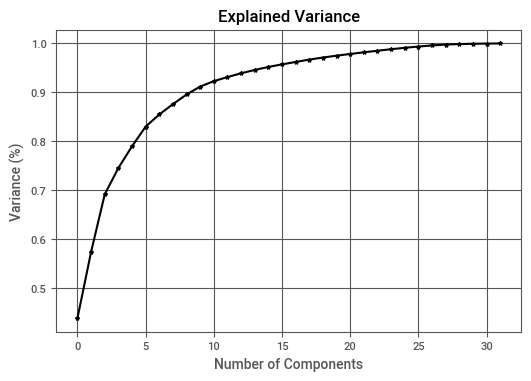

In [114]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*',color='k')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.grid(True)
plt.show()

* #### 10 components explains 92% variance in the data.

In [115]:
pca = PCA(n_components=10)
new_data = pca.fit_transform(data3)

In [116]:
PC_df = pd.DataFrame(data = new_data, 
                     columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9','PC10'])

# Model Building

## 1. K Mean Clustering

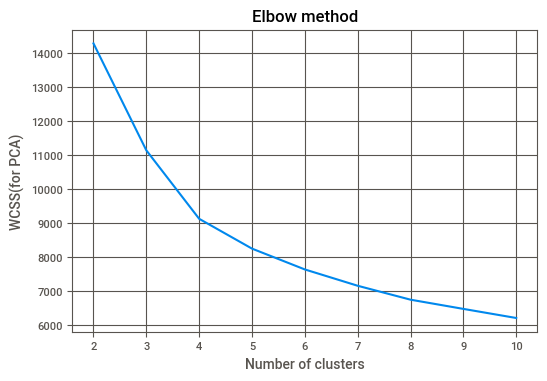

In [117]:
from sklearn.cluster import KMeans
wcss_pca = []
for cluster in range(2,11):
    kme_clu_pca = KMeans(n_clusters=cluster, random_state=9)
    kme_clu_pca.fit(PC_df)
    wcss_pca.append(kme_clu_pca.inertia_)

plt.plot(range(2,11), wcss_pca)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS(for PCA)")
plt.grid(True)
plt.show()

In [118]:
for n in range(3,6):
    model = KMeans(n_clusters=n, random_state=10)
    model.fit(PC_df)
    label=model.labels_
    score=silhouette_score(PC_df,label)
    print(f'(The silhouette score for {n} cluster is {score} )')
    

(The silhouette score for 3 cluster is 0.32658582809039455 )
(The silhouette score for 4 cluster is 0.27817423965269955 )
(The silhouette score for 5 cluster is 0.2502964054778071 )


In [119]:
model = KMeans(n_clusters=3, random_state=10)
model.fit(PC_df)

KMeans(n_clusters=3, random_state=10)

In [120]:
label=model.labels_
centroid = model.cluster_centers_
clusters=label.tolist()

In [121]:
reduced=PC_df.copy()
reduced['cluster'] = clusters
reduced['name'] = names
reduced.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster,name
0,-1.617514,0.890925,-0.417856,0.514090,0.126245,0.563645,-0.151384,0.257233,0.294005,0.089601,2,L. Messi
1,-1.434208,-0.291216,-0.491047,0.883348,0.229020,-0.228078,-0.015830,0.388811,0.251684,0.022292,1,Cristiano Ronaldo
2,-1.464591,0.058517,-0.975018,0.299246,-0.363024,0.149931,0.053835,0.058332,0.106652,0.278224,1,Neymar Jr
3,1.651601,0.006627,-0.272438,0.375038,-0.464154,0.023112,-0.115744,0.564413,0.526248,0.026056,0,J. Oblak
4,-1.415712,0.012230,-0.853263,0.273436,-0.333173,0.090317,-0.018059,0.006972,0.161439,0.048745,1,E. Hazard
5,-1.491424,-0.283305,-0.371778,0.391124,-0.818619,0.151786,-0.000956,-0.025391,0.037086,0.283168,1,K. De Bruyne
6,1.571261,-0.036966,-0.254411,0.559581,-0.555603,0.152410,-0.197299,0.513388,0.395086,0.262443,0,M. ter Stegen
7,-0.789795,-0.664410,0.471605,0.484779,0.018323,0.065165,-0.239950,0.226613,0.221640,-0.057754,1,V. van Dijk
8,-1.354156,-0.269630,-0.357507,0.190484,-0.725322,0.124531,0.186503,0.322848,-0.287100,0.040038,1,L. Modrić
9,-1.451120,0.809796,-0.199387,0.289001,-0.296214,-0.050896,-0.044910,0.063995,0.339134,-0.138956,2,M. Salah


In [122]:
# To plot in 2D,
pca = PCA(n_components = 2) # 2D PCA for the plot
new_data_for_plot = pd.DataFrame(pca.fit_transform(data3))

In [123]:

new_data_for_plot['cluster'] = clusters
new_data_for_plot['name'] = names
new_data_for_plot.columns = ['x', 'y', 'cluster', 'name']
new_data_for_plot.head(10)

,x,y,cluster,name
0,-1.617514,0.890925,2,L. Messi
1,-1.434208,-0.291215,1,Cristiano Ronaldo
2,-1.464591,0.058517,1,Neymar Jr
3,1.651601,0.006627,0,J. Oblak
4,-1.415712,0.012230,1,E. Hazard
5,-1.491424,-0.283305,1,K. De Bruyne
6,1.571261,-0.036966,0,M. ter Stegen
7,-0.789795,-0.664410,1,V. van Dijk
8,-1.354156,-0.269630,1,L. Modrić
9,-1.451120,0.809796,2,M. Salah


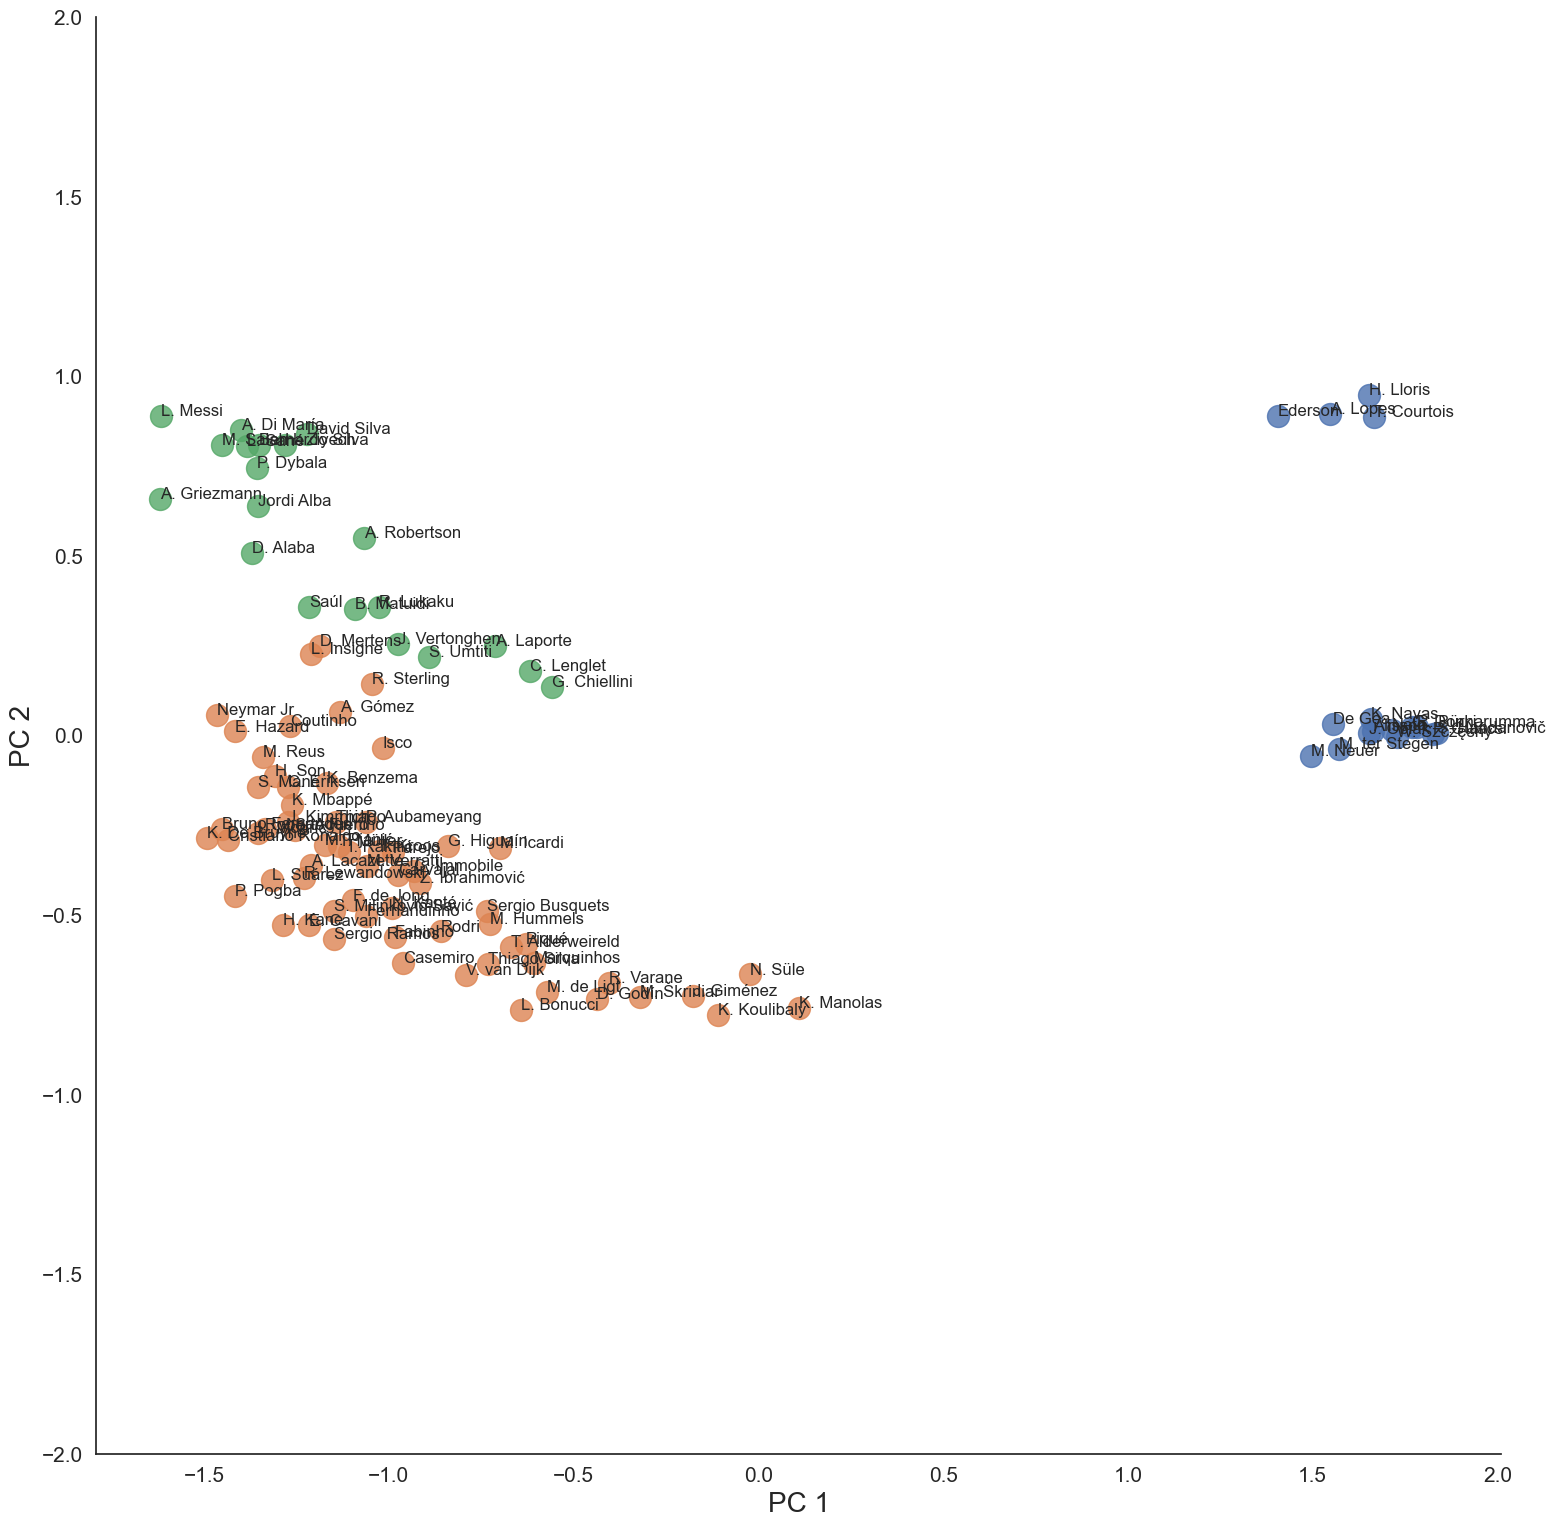

In [124]:
plot_data=new_data_for_plot.head(100)
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = plot_data, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(plot_data.x, plot_data.y, plot_data.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

## 2. DBSCAN

## Plot to chose min_samples and epsilon value for DBSCAN Model

No.of neighbors:135


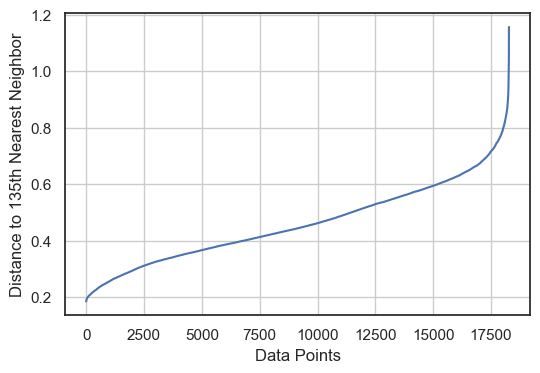

In [125]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# A common rule of thumb is to set n_neighbors to the square root of the number of samples in your dataset.
n_samples = PC_df.shape[0]
n_neighbors_value = int(np.sqrt(n_samples))
print(f'No.of neighbors:{n_neighbors_value}')

# Initialize NearestNeighbors with the chosen n_neighbors value
neighbors = NearestNeighbors(n_neighbors=n_neighbors_value)
neighbors.fit(PC_df)
distances, indices = neighbors.kneighbors(PC_df)


# Sort the distances and plot the k-distance graph
distances = np.sort(distances[:,n_neighbors_value-1], axis=0)
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel(f'Distance to {n_neighbors_value}th Nearest Neighbor')
plt.grid(True)
plt.show()

* #### From 0.8, the line is steady

In [127]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.8,min_samples=135)

In [128]:
model=dbscan.fit(PC_df)

labels=model.labels_

In [129]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
n_clusters

4

In [130]:
clusters = labels.tolist()

In [131]:
print(metrics.silhouette_score(PC_df,labels))

0.29836110034167473


In [132]:
reduced=PC_df.copy()
reduced['cluster'] = clusters
reduced['name'] = names
reduced.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster,name
0,-1.617514,0.890925,-0.417856,0.514090,0.126245,0.563645,-0.151384,0.257233,0.294005,0.089601,2,L. Messi
1,-1.434208,-0.291216,-0.491047,0.883348,0.229020,-0.228078,-0.015830,0.388811,0.251684,0.022292,1,Cristiano Ronaldo
2,-1.464591,0.058517,-0.975018,0.299246,-0.363024,0.149931,0.053835,0.058332,0.106652,0.278224,1,Neymar Jr
3,1.651601,0.006627,-0.272438,0.375038,-0.464154,0.023112,-0.115744,0.564413,0.526248,0.026056,0,J. Oblak
4,-1.415712,0.012230,-0.853263,0.273436,-0.333173,0.090317,-0.018059,0.006972,0.161439,0.048745,1,E. Hazard
5,-1.491424,-0.283305,-0.371778,0.391124,-0.818619,0.151786,-0.000956,-0.025391,0.037086,0.283168,1,K. De Bruyne
6,1.571261,-0.036966,-0.254411,0.559581,-0.555603,0.152410,-0.197299,0.513388,0.395086,0.262443,0,M. ter Stegen
7,-0.789795,-0.664410,0.471605,0.484779,0.018323,0.065165,-0.239950,0.226613,0.221640,-0.057754,1,V. van Dijk
8,-1.354156,-0.269630,-0.357507,0.190484,-0.725322,0.124531,0.186503,0.322848,-0.287100,0.040038,1,L. Modrić
9,-1.451120,0.809796,-0.199387,0.289001,-0.296214,-0.050896,-0.044910,0.063995,0.339134,-0.138956,2,M. Salah


In [133]:
# To plot in 2D
pca = PCA(n_components = 2) # 2D PCA for the plot
new_data_for_plot = pd.DataFrame(pca.fit_transform(data3))

In [134]:
new_data_for_plot['cluster'] = clusters
new_data_for_plot['name'] = names
new_data_for_plot.columns = ['x', 'y', 'cluster', 'name']
new_data_for_plot.head(10)

,x,y,cluster,name
0,-1.617514,0.890925,2,L. Messi
1,-1.434208,-0.291215,1,Cristiano Ronaldo
2,-1.464591,0.058517,1,Neymar Jr
3,1.651601,0.006627,0,J. Oblak
4,-1.415712,0.012230,1,E. Hazard
5,-1.491424,-0.283305,1,K. De Bruyne
6,1.571261,-0.036966,0,M. ter Stegen
7,-0.789795,-0.664410,1,V. van Dijk
8,-1.354156,-0.269630,1,L. Modrić
9,-1.451120,0.809796,2,M. Salah


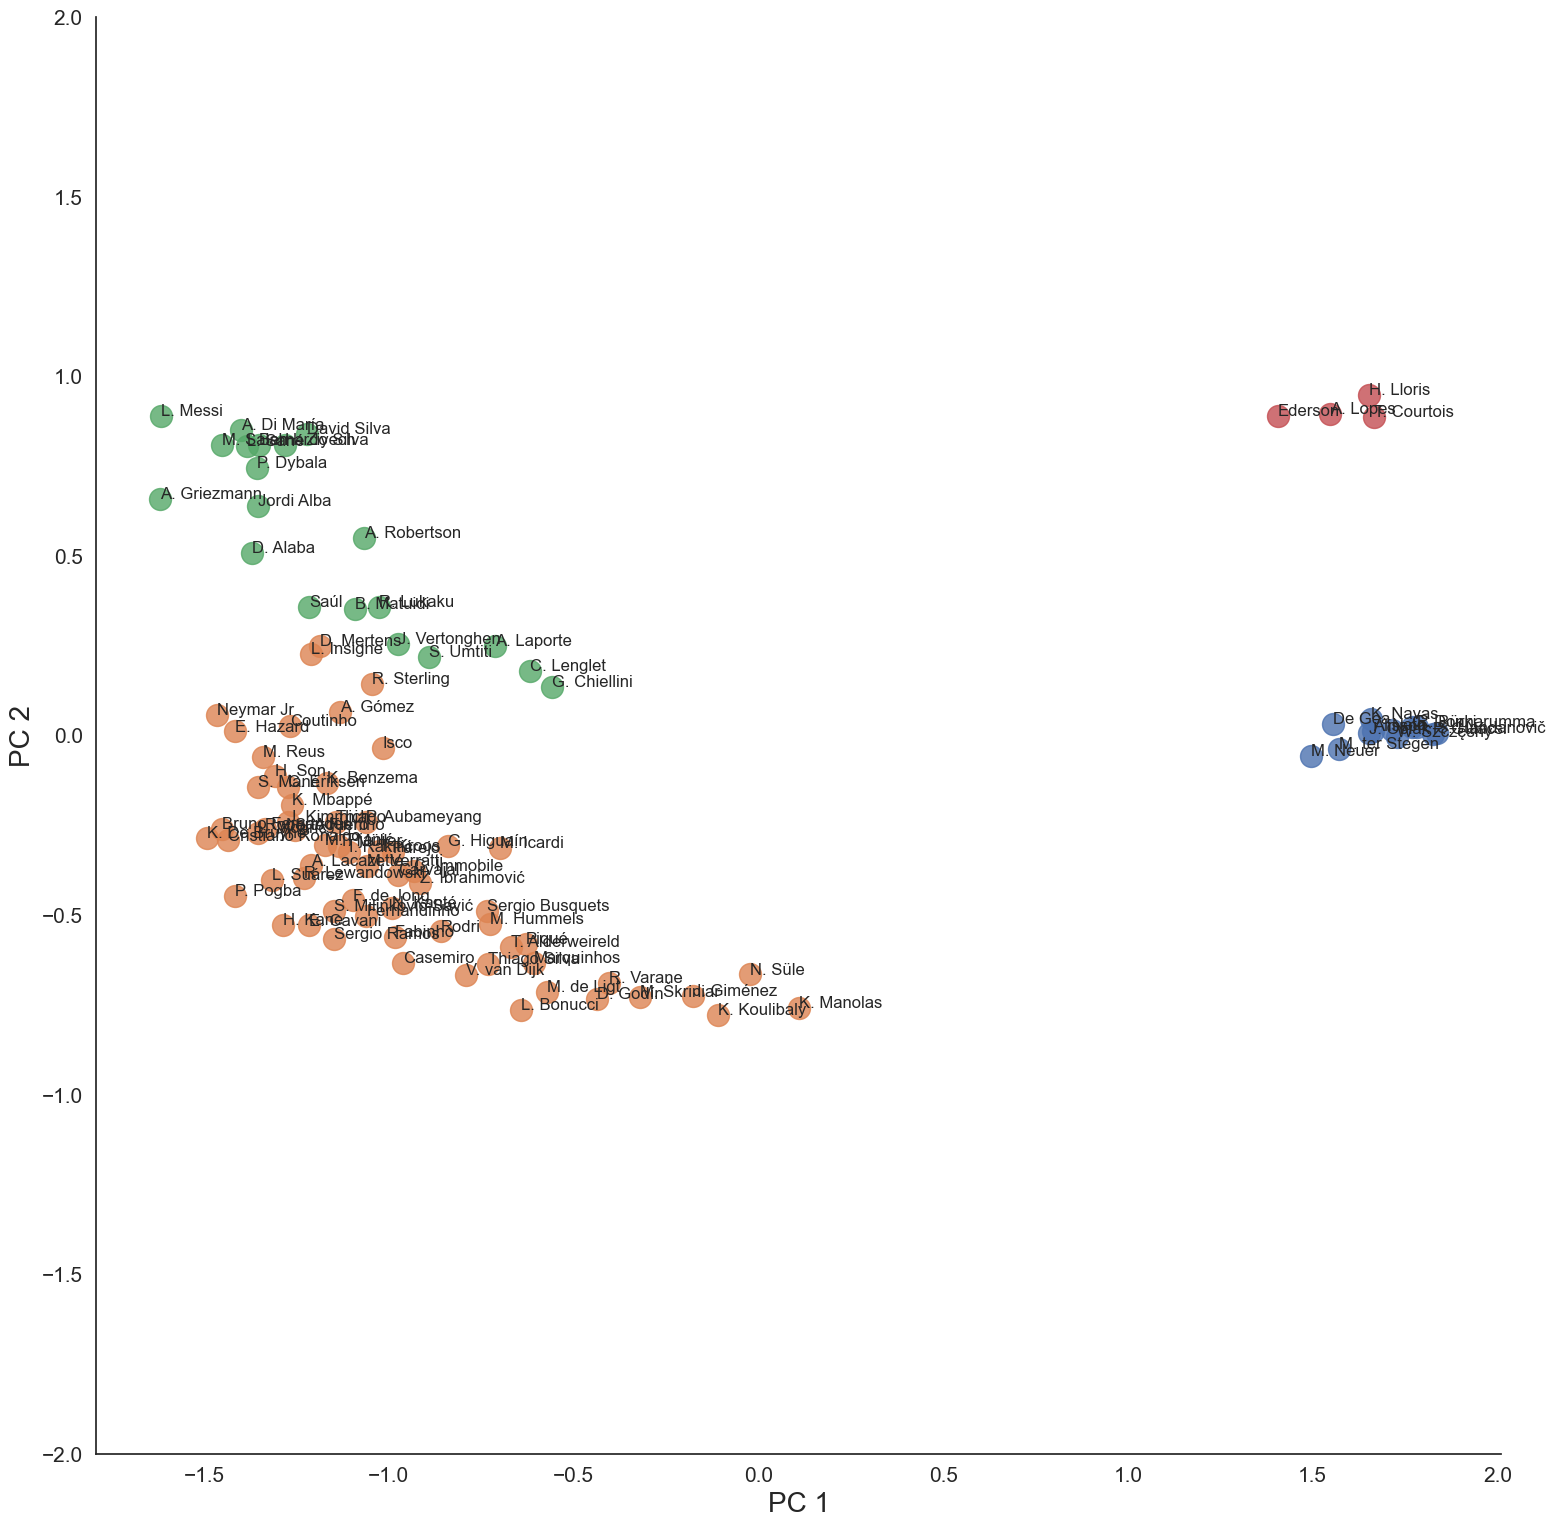

In [135]:
plot_data=new_data_for_plot.head(100)
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = plot_data, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(plot_data.x, plot_data.y, plot_data.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

In [136]:
new_data_for_plot.loc[new_data_for_plot['cluster']==0].head(10)

,x,y,cluster,name
3,1.651601,0.006627,0,J. Oblak
6,1.571261,-0.036966,0,M. ter Stegen
13,1.663303,0.014181,0,Alisson
14,1.553799,0.033709,0,De Gea
30,1.837329,0.008137,0,S. Handanovič
31,1.495393,-0.056297,0,M. Neuer
53,1.657647,0.046310,0,K. Navas
60,1.727221,-0.004039,0,W. Szczęsny
74,1.767492,0.024063,0,G. Donnarumma
87,1.825092,0.004315,0,P. Gulácsi


In [138]:
# Checking the data in the indices - 3,6,13,14,30
original_data.iloc[[3,6,13,14,30]]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,NaN,GK,1.0,NaN,2014-07-01,2022.0,SUB,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramses Becker,26,1992-10-02,191,91,Brazil,Liverpool,89,91,58000000,155000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,111700000.0,NaN,GK,1.0,NaN,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,"Flair, Swerve Pass",17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,28,1990-11-07,192,82,Spain,Manchester United,89,90,56000000,205000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,110600000.0,NaN,GK,1.0,NaN,2011-07-01,2020.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,84.0,81.0,92.0,58.0,85.0,"Flair, Second Wind, Flair Passes",17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,162835,https://sofifa.com/player/162835/samir-handano...,S. Handanovič,Samir Handanovič,34,1984-07-14,193,92,Slovenia,Inter,88,88,26000000,110000,GK,Right,3,2,1,Medium/Medium,Normal,Yes,44200000.0,NaN,GK,1.0,NaN,2012-07-01,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,69.0,89.0,53.0,89.0,"Flair, Giant Throw-in",12,10,10,36,12,12,12,14,34,16,51,55,47,83,36,52,78,41,71,19,25,22,12,41,23,69,25,10,13,88,85,69,89,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
new_data_for_plot.loc[new_data_for_plot['cluster']==3].head(10)

,x,y,cluster,name
25,1.405172,0.889988,3,Ederson
28,1.666547,0.888813,3,T. Courtois
32,1.652436,0.950074,3,H. Lloris
86,1.545833,0.894984,3,A. Lopes
167,1.486540,0.924189,3,Pau López
181,1.358157,0.851528,3,J. Pickford
184,1.708623,0.883110,3,K. Casteels
201,1.569363,0.905180,3,Casillas
211,1.532809,0.870145,3,Rui Patrício
257,1.795752,0.931075,3,B. Lecomte


In [140]:
# Checking the data in the indices - 25,28,32,86
original_data.iloc[[25,28,32,86]]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
25,210257,https://sofifa.com/player/210257/ederson-santa...,Ederson,Ederson Santana de Moraes,25,1993-08-17,188,86,Brazil,Manchester City,88,91,54500000,185000,GK,Left,2,3,1,Medium/Medium,Normal,Yes,104900000.0,NaN,GK,31.0,NaN,2017-07-01,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,"Leadership, Swerve Pass, Acrobatic Clearance",20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,192119,https://sofifa.com/player/192119/thibaut-court...,T. Courtois,Thibaut Courtois,27,1992-05-11,199,96,Belgium,Real Madrid,88,89,48000000,235000,GK,Left,4,2,1,Medium/Medium,Courtois,Yes,102000000.0,NaN,GK,13.0,NaN,2018-08-09,2024.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,89.0,72.0,87.0,49.0,85.0,"Flair, Acrobatic Clearance",14,14,13,33,12,13,19,20,35,23,46,52,61,83,45,54,68,38,70,17,23,15,13,44,27,66,20,18,16,85,89,72,85,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,167948,https://sofifa.com/player/167948/hugo-lloris/2...,H. Lloris,Hugo Lloris,32,1986-12-26,188,82,France,Tottenham Hotspur,88,88,36000000,150000,GK,Left,4,1,1,Medium/Medium,Lean,Yes,66600000.0,NaN,GK,1.0,NaN,2012-08-31,2022.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0,82.0,68.0,91.0,63.0,84.0,"Swerve Pass, Acrobatic Clearance",13,10,10,50,11,10,11,10,50,34,65,62,55,86,54,51,74,41,43,14,31,27,10,30,40,65,29,10,18,89,82,68,84,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,199482,https://sofifa.com/player/199482/anthony-lopes...,A. Lopes,Anthony Lopes,28,1990-10-01,184,81,Portugal,Olympique Lyonnais,85,87,33500000,88000,GK,Left,2,2,1,Medium/Medium,Normal,Yes,66200000.0,NaN,GK,1.0,NaN,2011-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,80.0,75.0,89.0,64.0,84.0,"Giant Throw-in, Swerve Pass, Acrobatic Clearance",19,18,16,32,13,15,15,14,31,21,63,64,67,84,62,56,82,36,73,18,43,25,9,48,16,65,13,15,13,87,80,75,84,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The goalkeepers are futher divided according to Left and Right Preferred Foot. Hence, the 4 clusters.

## 3.Hierarchical Clustering

In [141]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [142]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = model.fit_predict(PC_df)

In [143]:
silhouette_scores = []
for n_clusters in range(2, 6): 
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model.fit_predict(PC_df)
    silhouette_scores.append(silhouette_score(PC_df, labels))


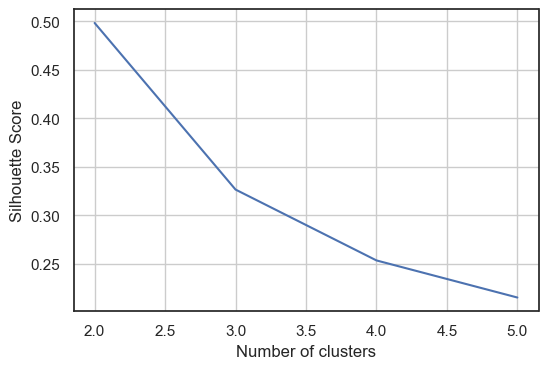

In [144]:
plt.plot(range(2, 6), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

### Visualize the dendrogram for first 100 data

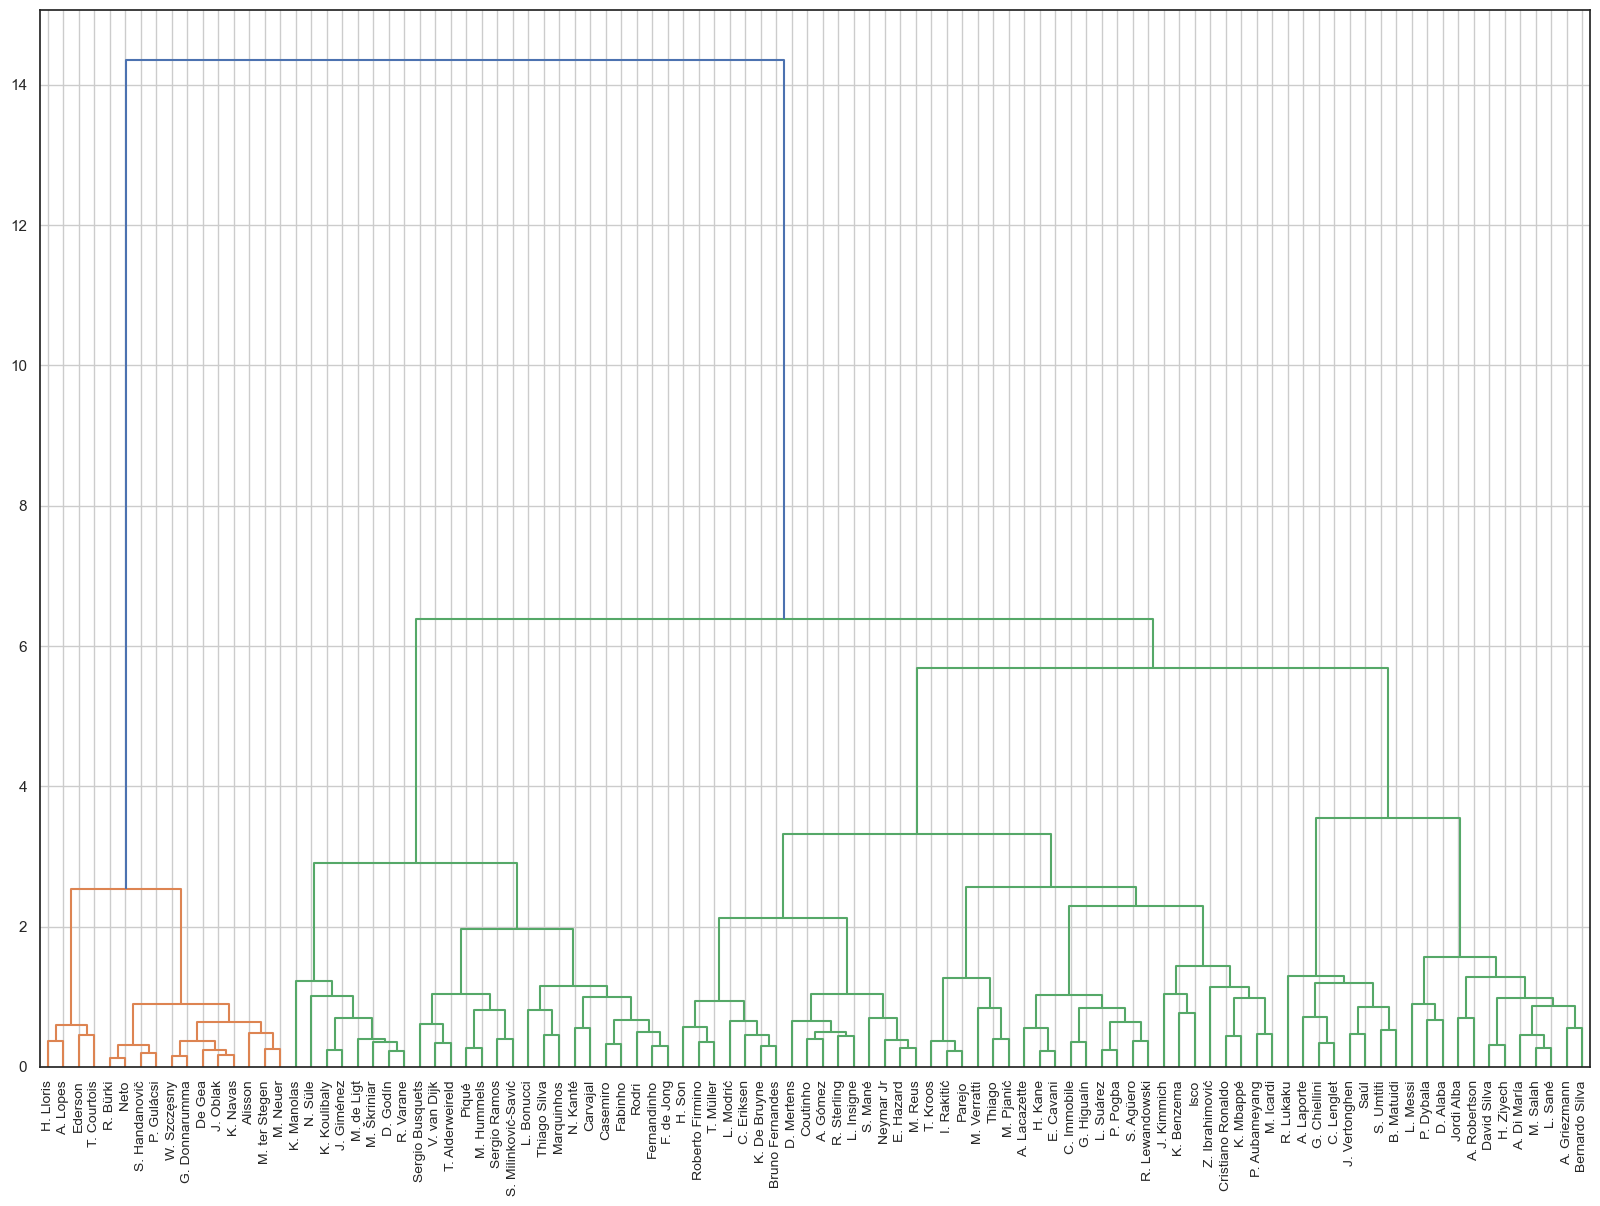

In [145]:

plt.figure(figsize=(20,14))
linkage_matrix = linkage(PC_df.head(100), method='ward')
dendrogram(linkage_matrix,labels= names[0:100], leaf_font_size = 10)
plt.grid(True)
plt.show()

* For first 100 data, it shows 4 clusters. To find it, we have to find the longest vertical line where no horizontal line crosses.
1. Cluster1- orange line (goalkeepers)
2. cluster2- K.Manolas to F. de Jong
3. cluster3- H.Son to M.Icardi
4. cluster4- R.Lukaku to Bernardo Silva

In [ ]:
#pip install tabulate

In [146]:
from tabulate import tabulate

headers = ["Models => ", "K-Means", "DBSCAN", "Hierarchical"]
data = [["Silhouette Score", 0.326, 0.298, 0.3],
        ["Number of Clusters", 3, 4, 3]
]

# Generate the table
table = tabulate(data, headers=headers, tablefmt="grid")

# Print the table
print(table)

+--------------------+-----------+----------+----------------+
| Models =>          |   K-Means |   DBSCAN |   Hierarchical |
+====================+===========+==========+================+
| Silhouette Score   |     0.326 |    0.298 |            0.3 |
+--------------------+-----------+----------+----------------+
| Number of Clusters |     3     |    4     |            3   |
+--------------------+-----------+----------+----------------+


# Conclusion

* K Mean Clustering is better because its Silouette score is better than the other 2 models.
* DBSCAN further divided goalkeepers with LEFT and RIGHT footers. Hence, the 4 clusters.
* Hierarchical Clustering is the most time consuming. For huge dataset, its not recommended.